In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.patches as mpatches

%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE


### PROBLEM STATEMENT 

DTH provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer. Develop a churn prediction model for this company and provide business recommendations and unique campaign suggestions without providing loss to the company such that the revenue assurance team will approve of them. 



### Read the Data

In [2]:
churn = pd.read_excel('Customer Churn Data.xlsx',sheet_name='Data for DSBA')

In [3]:
churn.head().T

,0,1,2,3,4
AccountID,20000,20001,20002,20003,20004
Churn,1,1,1,1,1
Tenure,4,0,0,0,0
City_Tier,3.0,1.0,1.0,3.0,1.0
CC_Contacted_LY,6.0,8.0,30.0,15.0,12.0
Payment,Debit Card,UPI,Debit Card,Debit Card,Credit Card
Gender,Female,Male,Male,Male,Male
Service_Score,3.0,3.0,2.0,2.0,2.0
Account_user_count,3,4,4,4,3
account_segment,Super,Regular Plus,Regular Plus,Super,Regular Plus


### Basic Data Exploration

Perform basic data exploration using Head, info and shape functions

### Shape

In [4]:
churn.shape

(11260, 19)

### Info

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

### Check for  duplicates

In [6]:
dups = churn.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Checking object data head and unique values of all the categorical variables

In [7]:
churn.select_dtypes(include='object').head()

,Tenure,Payment,Gender,Account_user_count,account_segment,Marital_Status,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4,Debit Card,Female,3,Super,Single,9,11,1,5,159.93,Mobile
1,0,UPI,Male,4,Regular Plus,Single,7,15,0,0,120.9,Mobile
2,0,Debit Card,Male,4,Regular Plus,Single,6,14,0,3,NaN,Mobile
3,0,Debit Card,Male,4,Super,Single,8,23,0,3,134.07,Mobile
4,0,Credit Card,Male,3,Regular Plus,Single,3,11,1,3,129.6,Mobile


In [8]:
churn.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [9]:
churn.Account_user_count.unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [10]:
churn.rev_per_month.unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [11]:
churn.rev_growth_yoy.unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [12]:
churn.coupon_used_for_payment.value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
$        1
#        1
*        1
Name: coupon_used_for_payment, dtype: int64

In [13]:
churn.Complain_ly.unique()

array([ 1.,  0., nan])

In [14]:
churn.Day_Since_CC_connect.unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [15]:
churn.cashback.unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [16]:
temp = pd.DataFrame(churn.cashback.str.isdigit())  

temp[temp['cashback'] == False]

,cashback
440,False
1257,False


In [17]:
churn.iloc[440]

AccountID                         20440
Churn                                 0
Tenure                                0
City_Tier                           1.0
CC_Contacted_LY                    16.0
Payment                     Credit Card
Gender                             Male
Service_Score                       3.0
Account_user_count                    2
account_segment            Regular Plus
CC_Agent_Score                      3.0
Marital_Status                   Single
rev_per_month                         2
Complain_ly                         0.0
rev_growth_yoy                       18
coupon_used_for_payment               1
Day_Since_CC_connect                  2
cashback                              $
Login_device                     Mobile
Name: 440, dtype: object

In [18]:
for column in churn.columns:
    if churn[column].dtype == "object":
        print(column.upper(), ": ", churn[column].nunique())
        print(churn[column].value_counts())
        print("\n")
        print("*" * 55)
        print("\n")

TENURE :  38
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
4      403
5      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
30     137
28     137
27     131
99     131
26     122
#      116
29     114
25     114
31      96
50       2
51       2
60       2
61       2
Name: Tenure, dtype: int64


*******************************************************


PAYMENT :  5
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


*******************************************************


GENDER :  4
Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64


*******************************************************


ACCOUNT_USER_COUNT :  7
4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Nam

### Cleaning up the Data and Removing  garbage

In [19]:
replaceStruct = {
                "Tenure":     {"#": np.nan},
                "Account_user_count": {"@": np.nan},
                  "rev_per_month":     {"+": np.nan },
                "rev_growth_yoy": {"$": np.nan},
                "coupon_used_for_payment": {"#": np.nan, "$": np.nan,"*": np.nan},
                 "Day_Since_CC_connect": {"$": np.nan},
                  "cashback": {"$": np.nan}
                   }

In [20]:
churn = churn.replace(replaceStruct)

In [21]:
churn.Day_Since_CC_connect.unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [22]:
churn.iloc[440]

AccountID                         20440
Churn                                 0
Tenure                              0.0
City_Tier                           1.0
CC_Contacted_LY                    16.0
Payment                     Credit Card
Gender                             Male
Service_Score                       3.0
Account_user_count                  2.0
account_segment            Regular Plus
CC_Agent_Score                      3.0
Marital_Status                   Single
rev_per_month                       2.0
Complain_ly                         0.0
rev_growth_yoy                     18.0
coupon_used_for_payment             1.0
Day_Since_CC_connect                2.0
cashback                            NaN
Login_device                     Mobile
Name: 440, dtype: object

### Converting to Float Data type

In [23]:
churn[["Tenure","Account_user_count","rev_per_month","rev_growth_yoy","coupon_used_for_payment",
"Day_Since_CC_connect","cashback"]]=churn[["Tenure","Account_user_count","rev_per_month","rev_growth_yoy","coupon_used_for_payment",
"Day_Since_CC_connect","cashback"]].astype(str).astype('float64')

In [24]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

### Study of Data using Descriptive statistics 

In [25]:
churn = churn.drop(['AccountID'], axis = 1)

In [26]:
pd.options.display.float_format = '{:.2f}'.format   
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.00,0.17,0.37,0.00,0.00,0.00,0.00,1.00
Tenure,11042.00,11.03,12.88,0.00,2.00,9.00,16.00,99.00
City_Tier,11148.00,1.65,0.92,1.00,1.00,1.00,3.00,3.00
CC_Contacted_LY,11158.00,17.87,8.85,4.00,11.00,16.00,23.00,132.00
Service_Score,11162.00,2.90,0.73,0.00,2.00,3.00,3.00,5.00
Account_user_count,10816.00,3.69,1.02,1.00,3.00,4.00,4.00,6.00
CC_Agent_Score,11144.00,3.07,1.38,1.00,2.00,3.00,4.00,5.00
rev_per_month,10469.00,6.36,11.91,1.00,3.00,5.00,7.00,140.00
Complain_ly,10903.00,0.29,0.45,0.00,0.00,0.00,1.00,1.00
rev_growth_yoy,11257.00,16.19,3.76,4.00,13.00,15.00,19.00,28.00


### Cleaning Categorical Variables

In [27]:
for column in churn.columns:
    if churn[column].dtype == "object":
        print(column.upper(), ": ", churn[column].nunique())
        print(churn[column].value_counts())
        print("\n")
        print("*" * 55)
        print("\n")

PAYMENT :  5
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


*******************************************************


GENDER :  4
Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64


*******************************************************


ACCOUNT_SEGMENT :  7
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64


*******************************************************


MARITAL_STATUS :  3
Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64


*******************************************************


LOGIN_DEVICE :  3
Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64


*******************************************************




In [28]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [29]:
churn.Marital_Status = churn.Marital_Status.str.replace('Single', 'Unmarried').str.replace('Divorced', 'Unmarried')


In [30]:
churn.Gender = churn.Gender.str.replace('Male', 'M').str.replace('Female', 'F')

In [31]:
churn.Login_device = churn.Login_device.str.replace('&&&&', 'Unknown')

In [32]:
account_seg_code = {'Regular':0, 'Regular +':1,'Regular Plus':1, 'Super':2,'Super +':3,'Super Plus':3, 'HNI':4}
churn['account_segment'] =churn.account_segment.map(account_seg_code)

In [33]:
for column in churn.columns:
    if churn[column].dtype == "object":
        print(column.upper(), ": ", churn[column].nunique())
        print(churn[column].value_counts())
        print("\n")
        print("*" * 55)
        print("\n")

PAYMENT :  5
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


*******************************************************


GENDER :  2
M    6704
F    4448
Name: Gender, dtype: int64


*******************************************************


MARITAL_STATUS :  2
Married      5860
Unmarried    5188
Name: Marital_Status, dtype: int64


*******************************************************


LOGIN_DEVICE :  3
Mobile      7482
Computer    3018
Unknown      539
Name: Login_device, dtype: int64


*******************************************************




In [34]:
churn[['Payment','Gender','Marital_Status','Login_device']].describe()

,Payment,Gender,Marital_Status,Login_device
count,11151,11152,11048,11039
unique,5,2,2,3
top,Debit Card,M,Married,Mobile
freq,4587,6704,5860,7482


In [35]:
churn.account_segment.value_counts()

1.00    4124
2.00    4062
4.00    1639
3.00     818
0.00     520
Name: account_segment, dtype: int64

In [36]:
churn.Account_user_count.value_counts()

4.00    4569
3.00    3261
5.00    1699
2.00     526
1.00     446
6.00     315
Name: Account_user_count, dtype: int64

In [37]:
churn.Service_Score.value_counts()

3.00    5490
2.00    3251
4.00    2331
1.00      77
0.00       8
5.00       5
Name: Service_Score, dtype: int64

In [38]:
churn.CC_Agent_Score.value_counts()

3.00    3360
1.00    2302
5.00    2191
4.00    2127
2.00    1164
Name: CC_Agent_Score, dtype: int64

In [39]:
churn.columns


Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

### Missing value treatment

In [40]:
churn.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               221
dtype: int64

In [41]:
churn.City_Tier.value_counts()

1.00    7263
3.00    3405
2.00     480
Name: City_Tier, dtype: int64

All Numerical variables are imputed with Median and Categorical variables with mode

In [42]:
churn.coupon_used_for_payment.value_counts()

1.00     4373
2.00     2656
0.00     2150
3.00      698
4.00      424
5.00      284
6.00      234
7.00      184
8.00       88
9.00       34
10.00      34
11.00      30
12.00      26
13.00      22
14.00      12
15.00       4
16.00       4
Name: coupon_used_for_payment, dtype: int64

In [43]:
num = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback']

In [44]:
cat = ['City_Tier', 
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 
       'Complain_ly', 'Login_device']

In [45]:
for i in churn[num]:
    median = churn[i].median()
    churn[i] = churn[i].fillna(median)

In [46]:
for i in churn[cat]:
    churn[i].fillna(churn[i].mode()[0], inplace=True)

In [47]:
churn.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

### Outlier Treatment

In [48]:
num = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback']

Q1 = churn[num].quantile(0.25)
Q3 = churn[num].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [49]:
LL

Tenure                    -19.00
CC_Contacted_LY            -7.00
rev_per_month              -3.00
rev_growth_yoy              4.00
coupon_used_for_payment    -0.50
Day_Since_CC_connect       -5.50
cashback                   73.76
dtype: float64

In [50]:
((churn[num] > UL) | (churn[num] < LL)).sum()

Tenure                      139
CC_Contacted_LY              42
rev_per_month               185
rev_growth_yoy                0
coupon_used_for_payment    1380
Day_Since_CC_connect        130
cashback                    986
dtype: int64

It can be noticed that only 'coupon used for payment' and 'Cashback' has maximum number of outliers (10%), Rest all numerical variables has only few outliers.

In [51]:
UL

Tenure                     37.00
CC_Contacted_LY            41.00
rev_per_month              13.00
rev_growth_yoy             28.00
coupon_used_for_payment     3.50
Day_Since_CC_connect       14.50
cashback                  271.44
dtype: float64

In [52]:
churn.rev_growth_yoy.value_counts()

14.00    1524
13.00    1427
15.00    1286
12.00    1210
16.00     949
18.00     708
17.00     704
19.00     619
20.00     562
11.00     523
21.00     433
22.00     403
23.00     345
24.00     229
25.00     188
26.00      98
27.00      35
28.00      14
4.00        3
Name: rev_growth_yoy, dtype: int64

In [53]:
pd.options.display.float_format = '{:.2f}'.format   
churn[['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback']].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,11260.00,10.99,12.76,0.00,2.00,9.00,16.00,99.00
CC_Contacted_LY,11260.00,17.85,8.81,4.00,11.00,16.00,23.00,132.00
rev_per_month,11260.00,6.27,11.49,1.00,3.00,5.00,7.00,140.00
rev_growth_yoy,11260.00,16.19,3.76,4.00,13.00,15.00,19.00,28.00
coupon_used_for_payment,11260.00,1.79,1.97,0.00,1.00,1.00,2.00,16.00
Day_Since_CC_connect,11260.00,4.58,3.65,0.00,2.00,3.00,7.00,47.00
cashback,11260.00,194.93,174.98,0.00,147.89,165.25,197.31,1997.00


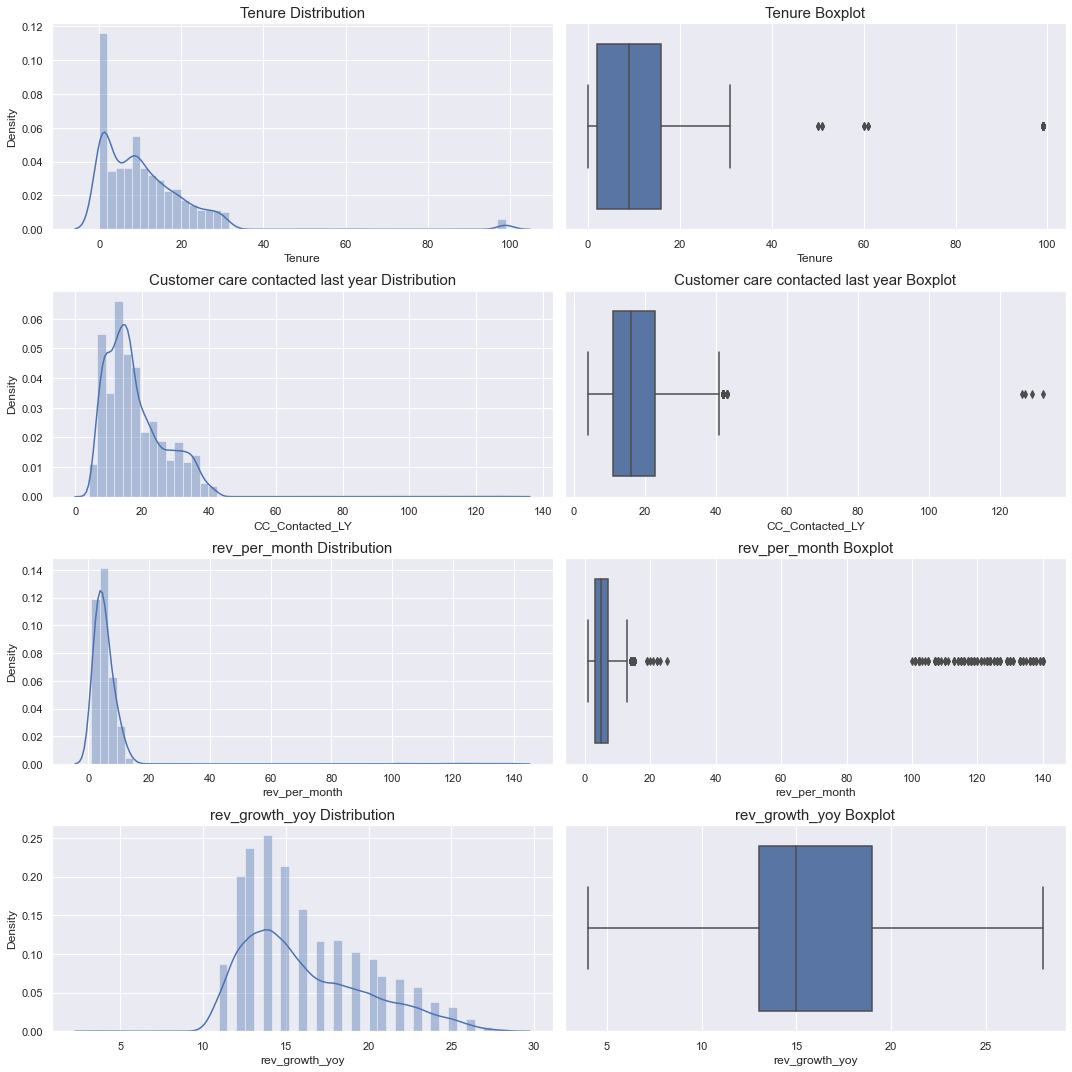

In [54]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)
a = sns.distplot(churn['Tenure'] , ax=axes[0][0])
a.set_title("Tenure Distribution",fontsize=15)
a = sns.boxplot(churn['Tenure'] , orient = "v" , ax=axes[0][1])
a.set_title("Tenure Boxplot",fontsize=15)

a = sns.distplot(churn['CC_Contacted_LY'] , ax=axes[1][0])
a.set_title("Customer care contacted last year Distribution",fontsize=15)

a = sns.boxplot(churn['CC_Contacted_LY'] , orient = "v" , ax=axes[1][1])
a.set_title("Customer care contacted last year Boxplot",fontsize=15)

a = sns.distplot(churn['rev_per_month'] , ax=axes[2][0])
a.set_title("rev_per_month Distribution",fontsize=15)

a = sns.boxplot(churn['rev_per_month'] , orient = "v" , ax=axes[2][1])
a.set_title("rev_per_month Boxplot",fontsize=15)

a = sns.distplot(churn['rev_growth_yoy'] , ax=axes[3][0])
a.set_title("rev_growth_yoy Distribution",fontsize=15)

a = sns.boxplot(churn['rev_growth_yoy'] , orient = "v" , ax=axes[3][1])
a.set_title("rev_growth_yoy Boxplot",fontsize=15)

plt.tight_layout()
plt.show()

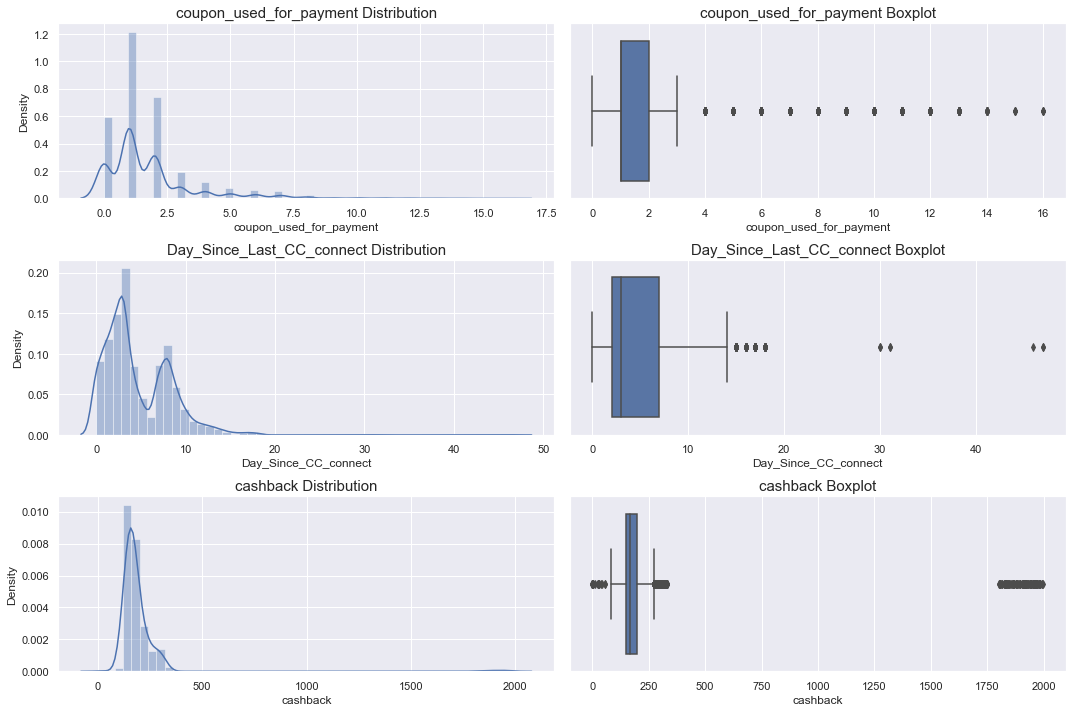

In [55]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 10)
a = sns.distplot(churn['coupon_used_for_payment'] , ax=axes[0][0])
a.set_title("coupon_used_for_payment Distribution",fontsize=15)
a = sns.boxplot(churn['coupon_used_for_payment'] , orient = "v" , ax=axes[0][1])
a.set_title("coupon_used_for_payment Boxplot",fontsize=15)

a = sns.distplot(churn['Day_Since_CC_connect'] , ax=axes[1][0])
a.set_title("Day_Since_Last_CC_connect Distribution",fontsize=15)

a = sns.boxplot(churn['Day_Since_CC_connect'] , orient = "v" , ax=axes[1][1])
a.set_title("Day_Since_Last_CC_connect Boxplot",fontsize=15)

a = sns.distplot(churn['cashback'] , ax=axes[2][0])
a.set_title("cashback Distribution",fontsize=15)

a = sns.boxplot(churn['cashback'] , orient = "v" , ax=axes[2][1])
a.set_title("cashback Boxplot",fontsize=15)

plt.tight_layout()
plt.show()

In [56]:
churn.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

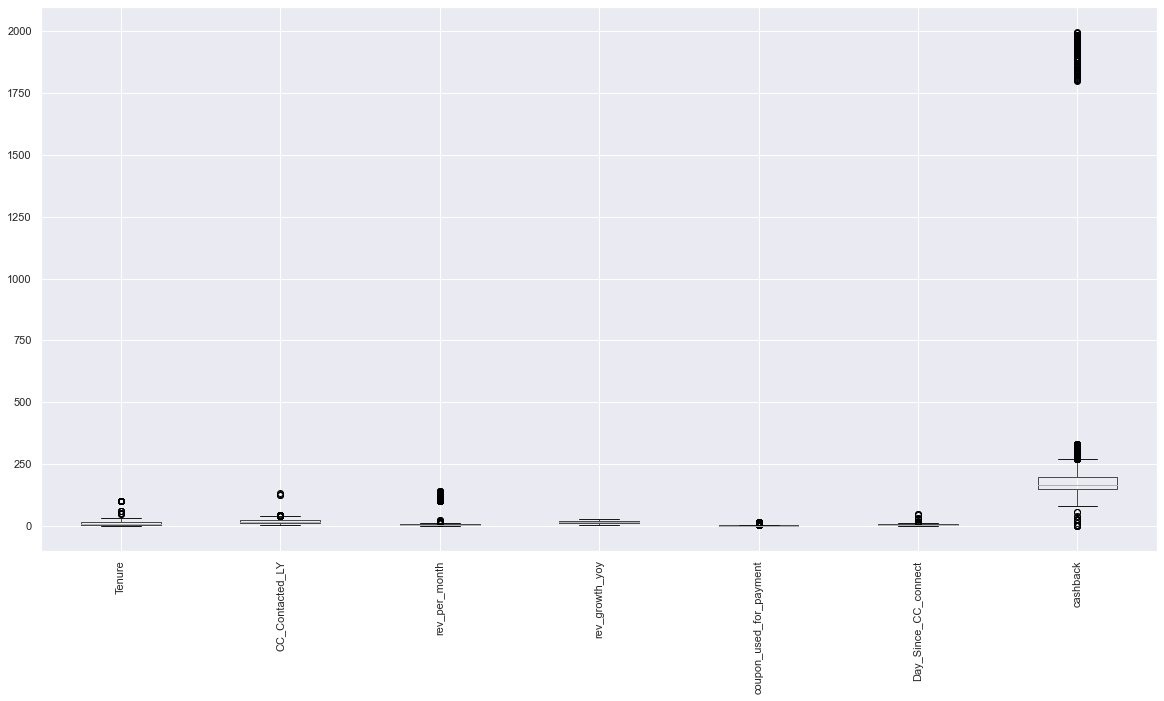

In [57]:
churn[['Tenure', 'CC_Contacted_LY', 'rev_per_month',
        'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', ]].boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

In [58]:

churn.cashback.value_counts().sort_index()

0.00       4
2.00       1
3.00       1
4.00       1
5.00       1
          ..
1984.00    1
1985.00    1
1991.00    1
1992.00    1
1997.00    1
Name: cashback, Length: 5692, dtype: int64

In [59]:
np.percentile(churn["cashback"], 92)

275.8932000000001

In [60]:
np.percentile(churn["coupon_used_for_payment"], 90)

4.0

In [61]:
np.percentile(churn["Account_user_count"], 0.5)

1.0

In [62]:
UL

Tenure                     37.00
CC_Contacted_LY            41.00
rev_per_month              13.00
rev_growth_yoy             28.00
coupon_used_for_payment     3.50
Day_Since_CC_connect       14.50
cashback                  271.44
dtype: float64

In [63]:
LL

Tenure                    -19.00
CC_Contacted_LY            -7.00
rev_per_month              -3.00
rev_growth_yoy              4.00
coupon_used_for_payment    -0.50
Day_Since_CC_connect       -5.50
cashback                   73.76
dtype: float64

### Treating Outliers

In [64]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [65]:
outlier = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
       'Day_Since_CC_connect', 'cashback']
for feature in churn[outlier]: 
    lr,ur=treat_outlier(churn[feature])
    churn[feature]=np.where(churn[feature]>ur,ur,churn[feature])
    churn[feature]=np.where(churn[feature]<lr,lr,churn[feature])

In [66]:

    churn['coupon_used_for_payment']=np.where(churn['coupon_used_for_payment']>4,4,churn['coupon_used_for_payment'])
    churn['coupon_used_for_payment']=np.where(churn['coupon_used_for_payment']<-0.50,-0.50,churn['coupon_used_for_payment'])

Here coupon used for payment is treated with 4 instead of 3.5 as obtained, because the variable coupon used for payment is an integer.

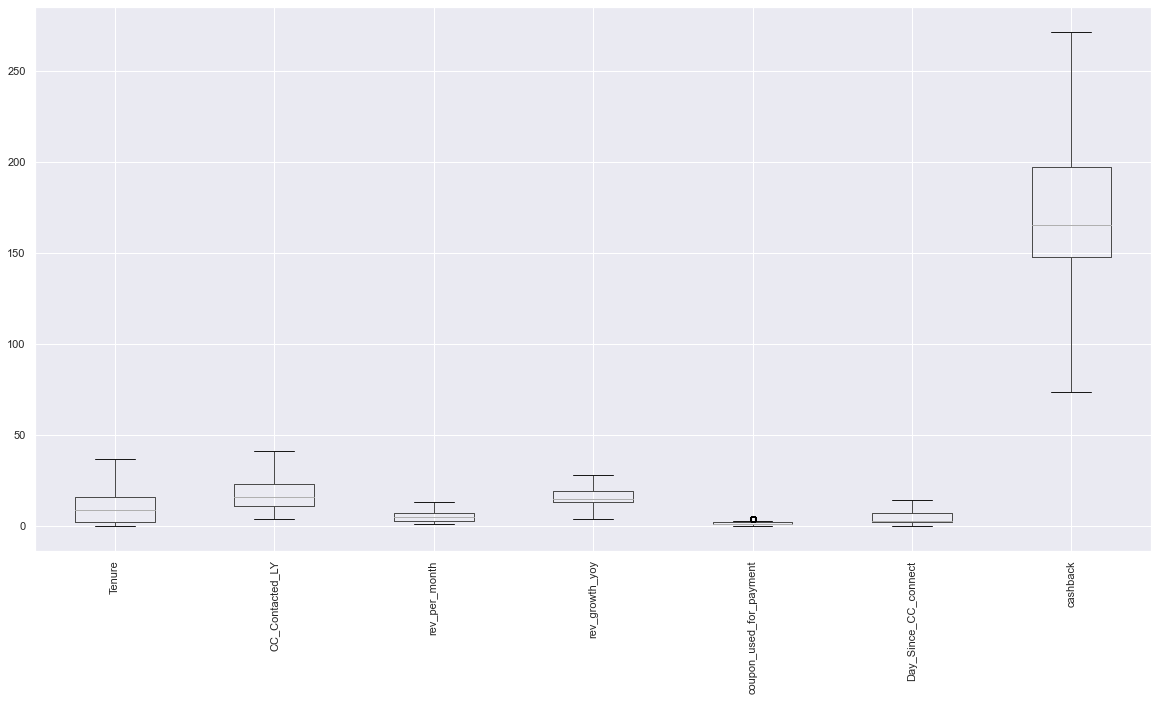

In [67]:
churn[['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback']].boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

In [68]:
churn.coupon_used_for_payment.value_counts().sort_index()

0.00    2150
1.00    4376
2.00    2656
3.00     698
4.00    1380
Name: coupon_used_for_payment, dtype: int64

In [69]:

churn.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.00,3.00,6.00,Debit Card,F,3.00,3.00,2.00,2.00,Unmarried,9.00,1.00,11.00,1.00,5.00,159.93,Mobile
1,1,0.00,1.00,8.00,UPI,M,3.00,4.00,1.00,3.00,Unmarried,7.00,1.00,15.00,0.00,0.00,120.90,Mobile
2,1,0.00,1.00,30.00,Debit Card,M,2.00,4.00,1.00,3.00,Unmarried,6.00,1.00,14.00,0.00,3.00,165.25,Mobile
3,1,0.00,3.00,15.00,Debit Card,M,2.00,4.00,2.00,5.00,Unmarried,8.00,0.00,23.00,0.00,3.00,134.07,Mobile
4,1,0.00,1.00,12.00,Credit Card,M,2.00,3.00,1.00,5.00,Unmarried,3.00,0.00,11.00,1.00,3.00,129.60,Mobile


### Data Imbalance

In [70]:
churn.Churn.value_counts(normalize=True)

0   0.83
1   0.17
Name: Churn, dtype: float64

In [71]:
churn.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [72]:
churn.Complain_ly.value_counts()

0.00    8149
1.00    3111
Name: Complain_ly, dtype: int64

In [73]:
chu = churn[(churn['Complain_ly']==1.00)&(churn['Churn']==1)]

In [74]:
chu

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.00,3.00,6.00,Debit Card,F,3.00,3.00,2.00,2.00,Unmarried,9.00,1.00,11.00,1.00,5.00,159.93,Mobile
1,1,0.00,1.00,8.00,UPI,M,3.00,4.00,1.00,3.00,Unmarried,7.00,1.00,15.00,0.00,0.00,120.90,Mobile
2,1,0.00,1.00,30.00,Debit Card,M,2.00,4.00,1.00,3.00,Unmarried,6.00,1.00,14.00,0.00,3.00,165.25,Mobile
5,1,0.00,1.00,22.00,Debit Card,F,3.00,4.00,1.00,5.00,Unmarried,2.00,1.00,22.00,4.00,7.00,139.19,Computer
7,1,0.00,1.00,6.00,Credit Card,M,3.00,3.00,1.00,2.00,Unmarried,3.00,1.00,16.00,2.00,0.00,122.93,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11165,1,1.00,1.00,19.00,Debit Card,F,3.00,2.00,1.00,3.00,Unmarried,6.00,1.00,17.00,1.00,4.00,153.32,Mobile
11185,1,1.00,3.00,40.00,E wallet,M,4.00,4.00,2.00,1.00,Married,5.00,1.00,13.00,1.00,9.00,185.17,Mobile
11186,1,9.00,3.00,34.00,Debit Card,M,4.00,4.00,4.00,5.00,Unmarried,10.00,1.00,15.00,1.00,3.00,229.48,Mobile
11232,1,1.00,1.00,13.00,Credit Card,M,3.00,4.00,1.00,1.00,Married,11.00,1.00,17.00,3.00,3.00,177.87,Mobile


In [75]:
ch = churn[(churn['cashback']>=200)&(churn['Churn']==1)]

In [76]:
ch

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
10,1,4.00,1.00,18.00,Cash on Delivery,F,2.00,3.00,0.00,3.00,Unmarried,2.00,0.00,12.00,4.00,8.00,271.44,Mobile
21,1,20.00,1.00,29.00,Credit Card,F,3.00,3.00,4.00,2.00,Unmarried,2.00,0.00,12.00,4.00,6.00,203.12,Mobile
24,1,14.00,1.00,14.00,Debit Card,M,2.00,5.00,4.00,2.00,Unmarried,3.00,0.00,15.00,0.00,3.00,206.50,Computer
85,1,0.00,3.00,10.00,Credit Card,M,2.00,5.00,4.00,2.00,Unmarried,2.00,0.00,11.00,4.00,8.00,204.00,Mobile
125,1,0.00,1.00,16.00,Credit Card,M,3.00,3.00,4.00,3.00,Married,7.00,0.00,11.00,1.00,0.00,200.48,Computer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11088,1,10.00,1.00,31.00,Credit Card,F,4.00,4.00,2.00,4.00,Married,8.00,0.00,24.00,4.00,8.00,215.26,Mobile
11116,1,1.00,3.00,12.00,E wallet,M,3.00,5.00,2.00,4.00,Unmarried,13.00,1.00,14.00,2.00,3.00,229.07,Mobile
11159,1,1.00,3.00,25.00,E wallet,F,3.00,4.00,2.00,3.00,Unmarried,5.00,1.00,14.00,1.00,3.00,223.54,Unknown
11186,1,9.00,3.00,34.00,Debit Card,M,4.00,4.00,4.00,5.00,Unmarried,10.00,1.00,15.00,1.00,3.00,229.48,Mobile


### Univariate Analysis

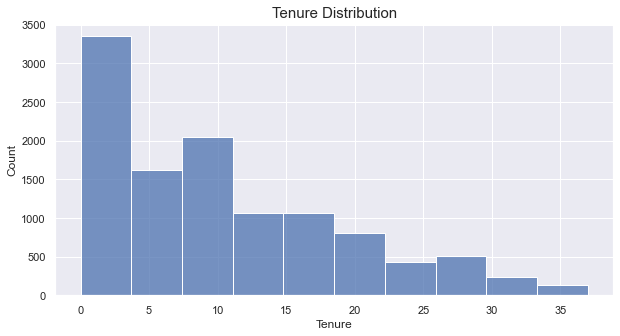

In [77]:
plt.figure(figsize=(10,5))
sns.histplot(churn['Tenure'],bins=10);
plt.title('Tenure Distribution',fontsize = 15);

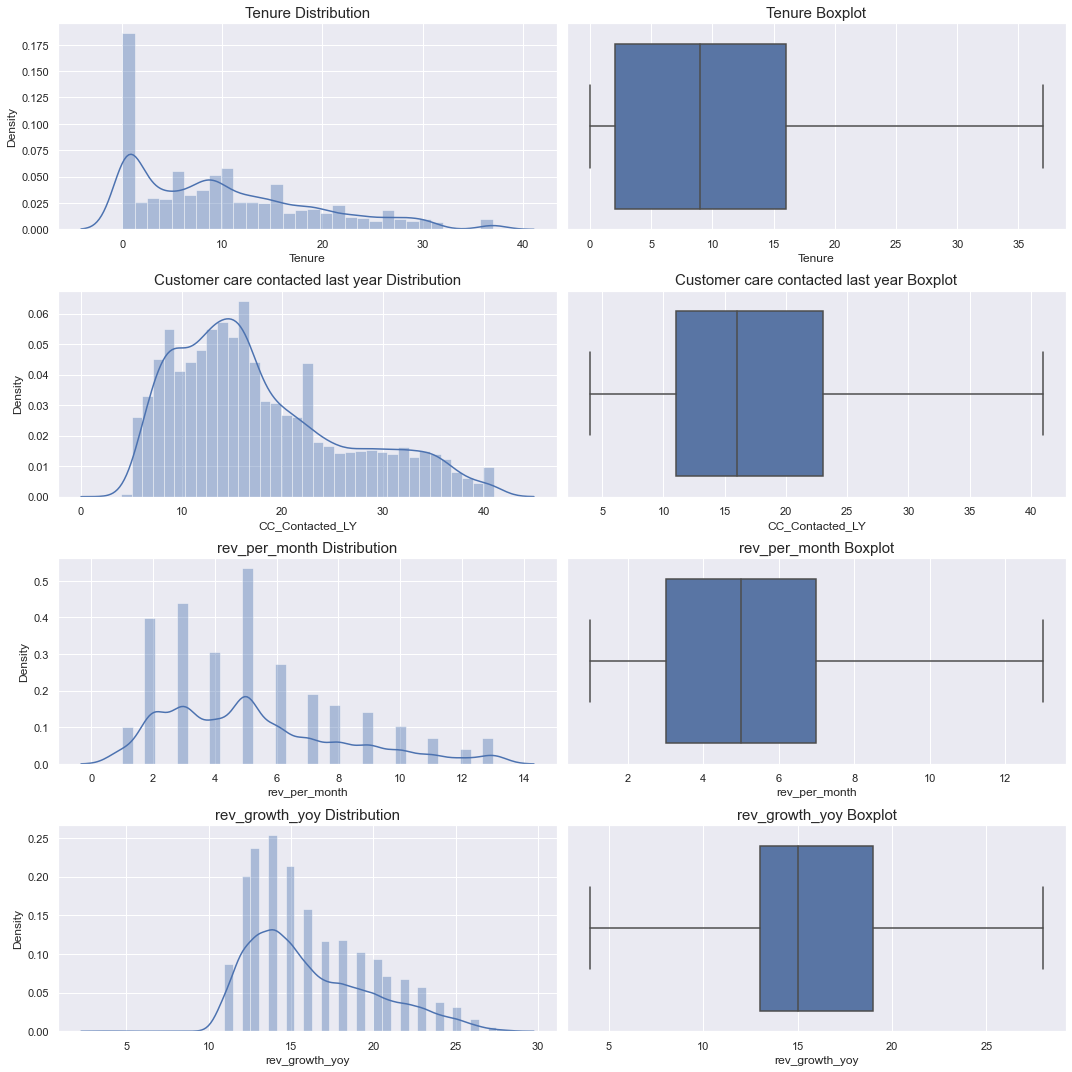

In [78]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)
a = sns.distplot(churn['Tenure'] , ax=axes[0][0])
a.set_title("Tenure Distribution",fontsize=15)
a = sns.boxplot(churn['Tenure'] , orient = "v" , ax=axes[0][1])
a.set_title("Tenure Boxplot",fontsize=15)

a = sns.distplot(churn['CC_Contacted_LY'] , ax=axes[1][0])
a.set_title("Customer care contacted last year Distribution",fontsize=15)

a = sns.boxplot(churn['CC_Contacted_LY'] , orient = "v" , ax=axes[1][1])
a.set_title("Customer care contacted last year Boxplot",fontsize=15)

a = sns.distplot(churn['rev_per_month'] , ax=axes[2][0])
a.set_title("rev_per_month Distribution",fontsize=15)

a = sns.boxplot(churn['rev_per_month'] , orient = "v" , ax=axes[2][1])
a.set_title("rev_per_month Boxplot",fontsize=15)

a = sns.distplot(churn['rev_growth_yoy'] , ax=axes[3][0])
a.set_title("rev_growth_yoy Distribution",fontsize=15)

a = sns.boxplot(churn['rev_growth_yoy'] , orient = "v" , ax=axes[3][1])
a.set_title("rev_growth_yoy Boxplot",fontsize=15)

plt.tight_layout()
plt.show()

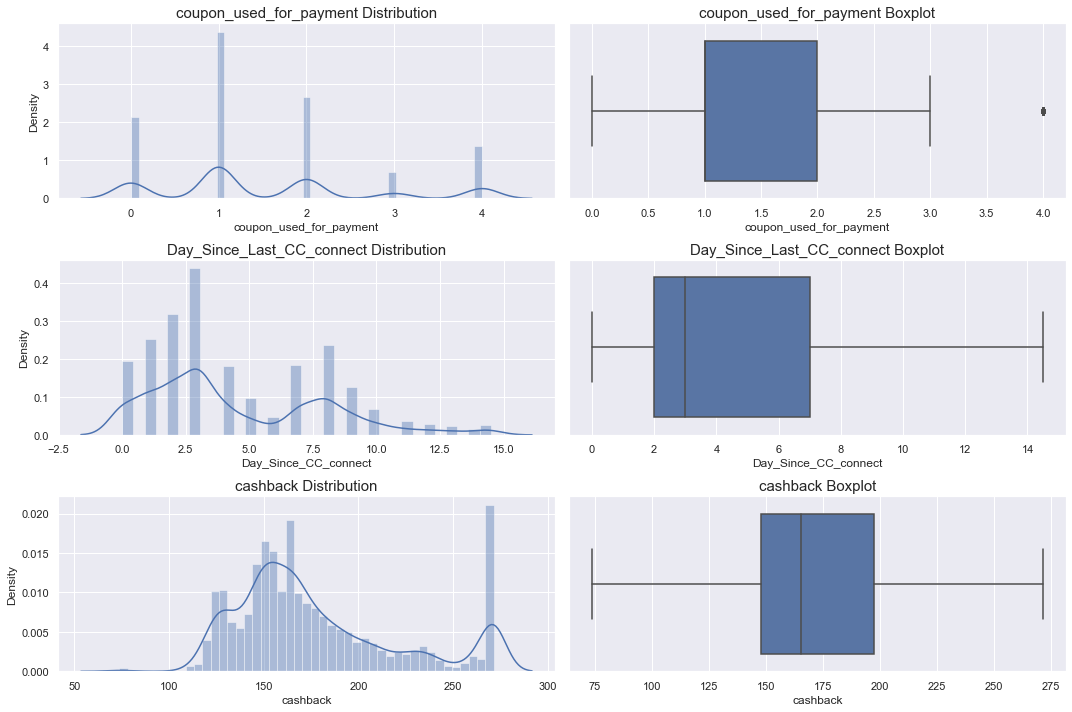

In [79]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 10)
a = sns.distplot(churn['coupon_used_for_payment'] , ax=axes[0][0])
a.set_title("coupon_used_for_payment Distribution",fontsize=15)
a = sns.boxplot(churn['coupon_used_for_payment'] , orient = "v" , ax=axes[0][1])
a.set_title("coupon_used_for_payment Boxplot",fontsize=15)

a = sns.distplot(churn['Day_Since_CC_connect'] , ax=axes[1][0])
a.set_title("Day_Since_Last_CC_connect Distribution",fontsize=15)

a = sns.boxplot(churn['Day_Since_CC_connect'] , orient = "v" , ax=axes[1][1])
a.set_title("Day_Since_Last_CC_connect Boxplot",fontsize=15)

a = sns.distplot(churn['cashback'] , ax=axes[2][0])
a.set_title("cashback Distribution",fontsize=15)

a = sns.boxplot(churn['cashback'] , orient = "v" , ax=axes[2][1])
a.set_title("cashback Boxplot",fontsize=15)

plt.tight_layout()
plt.show()

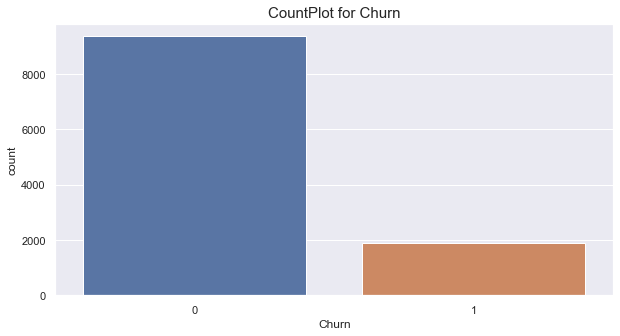

In [80]:
plt.figure(figsize=(10,5))
sns.countplot(x= churn['Churn']);
plt.title('CountPlot for Churn',fontsize = 15);

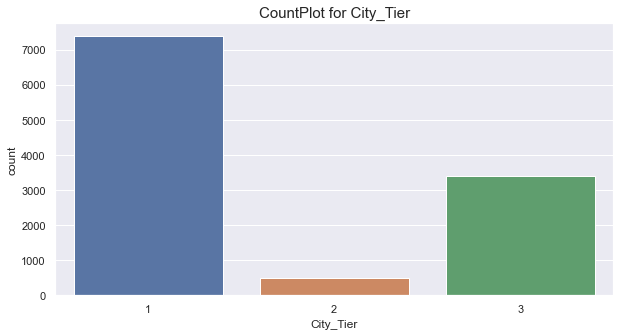

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(churn["City_Tier"].astype(int))
plt.title('CountPlot for City_Tier',fontsize = 15);

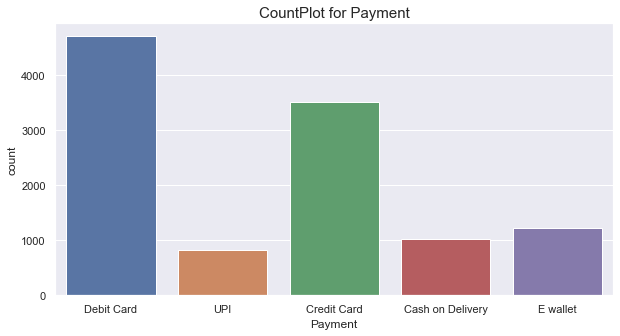

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(churn["Payment"])
plt.title('CountPlot for Payment',fontsize = 15);

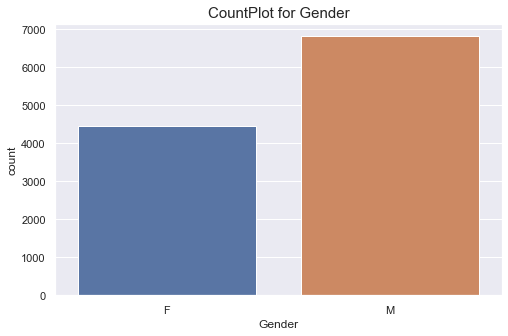

In [83]:
plt.figure(figsize=(8,5))
sns.countplot(churn["Gender"])
plt.title('CountPlot for Gender',fontsize = 15);

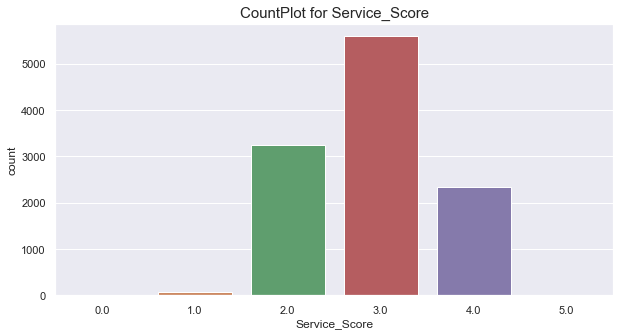

In [84]:
plt.figure(figsize=(10,5))
sns.countplot(churn["Service_Score"])
plt.title('CountPlot for Service_Score',fontsize = 15);

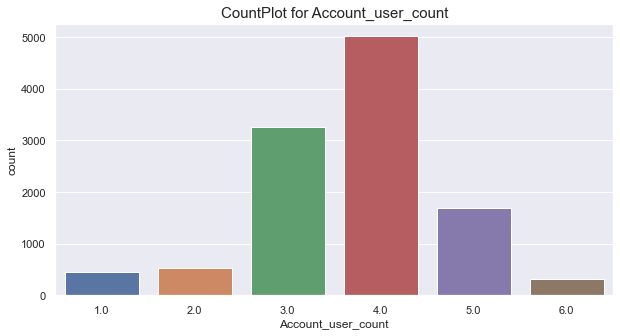

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(churn["Account_user_count"])
plt.title('CountPlot for Account_user_count',fontsize = 15);

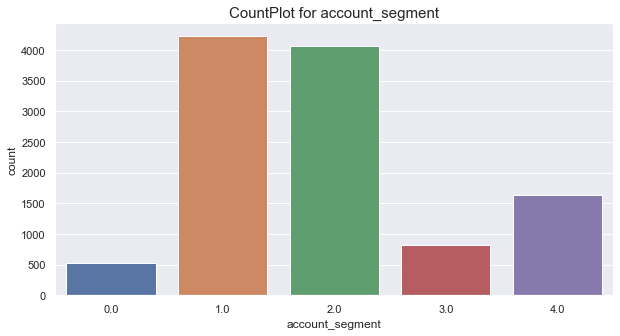

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(churn["account_segment"])
plt.title('CountPlot for account_segment',fontsize = 15);

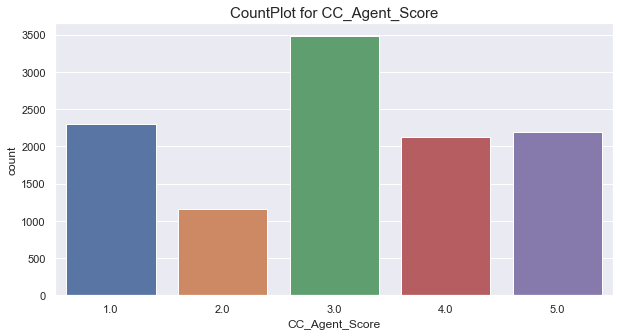

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(churn["CC_Agent_Score"])
plt.title('CountPlot for CC_Agent_Score',fontsize = 15);

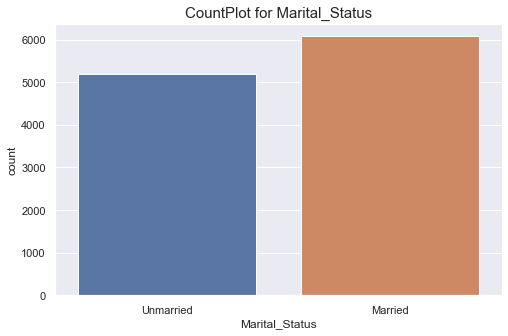

In [88]:
plt.figure(figsize=(8,5))
sns.countplot(churn["Marital_Status"])
plt.title('CountPlot for Marital_Status',fontsize = 15);

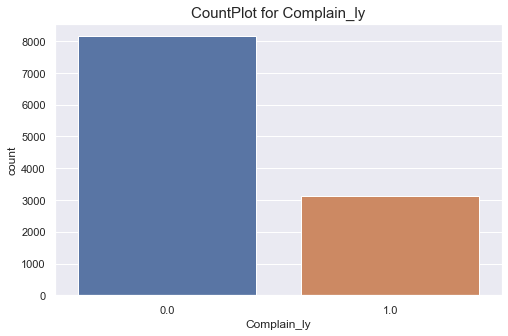

In [89]:
plt.figure(figsize=(8,5))
sns.countplot(churn["Complain_ly"])
plt.title('CountPlot for Complain_ly',fontsize = 15);

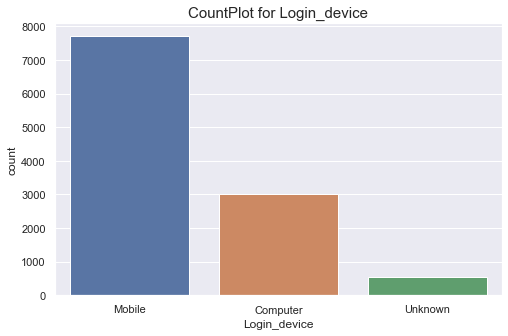

In [90]:
plt.figure(figsize=(8,5))
sns.countplot(churn["Login_device"])
plt.title('CountPlot for Login_device',fontsize = 15);

In [91]:
cat

['City_Tier',
 'Payment',
 'Gender',
 'Service_Score',
 'Account_user_count',
 'account_segment',
 'CC_Agent_Score',
 'Marital_Status',
 'Complain_ly',
 'Login_device']

In [92]:
churn.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.00,3.00,6.00,Debit Card,F,3.00,3.00,2.00,2.00,Unmarried,9.00,1.00,11.00,1.00,5.00,159.93,Mobile
1,1,0.00,1.00,8.00,UPI,M,3.00,4.00,1.00,3.00,Unmarried,7.00,1.00,15.00,0.00,0.00,120.90,Mobile
2,1,0.00,1.00,30.00,Debit Card,M,2.00,4.00,1.00,3.00,Unmarried,6.00,1.00,14.00,0.00,3.00,165.25,Mobile
3,1,0.00,3.00,15.00,Debit Card,M,2.00,4.00,2.00,5.00,Unmarried,8.00,0.00,23.00,0.00,3.00,134.07,Mobile
4,1,0.00,1.00,12.00,Credit Card,M,2.00,3.00,1.00,5.00,Unmarried,3.00,0.00,11.00,1.00,3.00,129.60,Mobile


### Bivariate Analysis

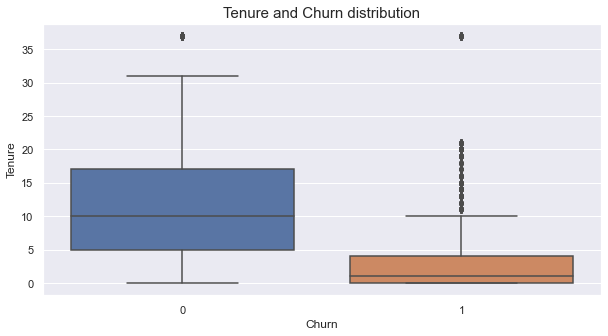

In [93]:
plt.figure(figsize=(10,5))
sns.boxplot(x = churn["Churn"], y=churn['Tenure'],data = churn)
plt.title('Tenure and Churn distribution',fontsize = 15);

<AxesSubplot:xlabel='Churn', ylabel='Tenure'>

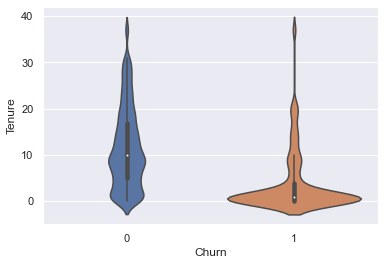

In [94]:
sns.violinplot(x = churn["Churn"], y=churn['Tenure'],data = churn)

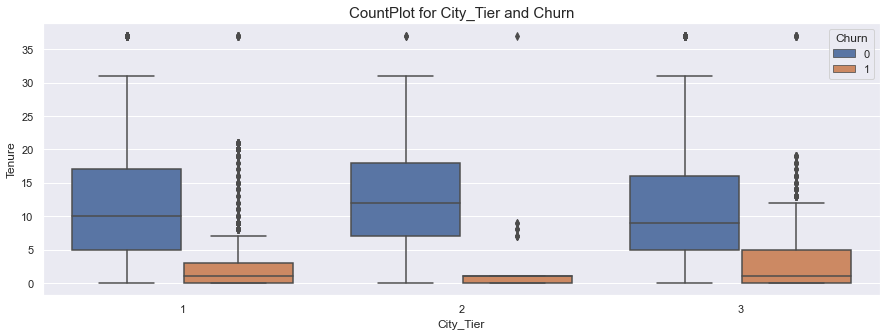

In [95]:
plt.figure(figsize=(15,5))
sns.boxplot(x=churn["City_Tier"].astype(int),y=churn['Tenure'],hue=churn['Churn'])
plt.title('CountPlot for City_Tier and Churn',fontsize = 15);

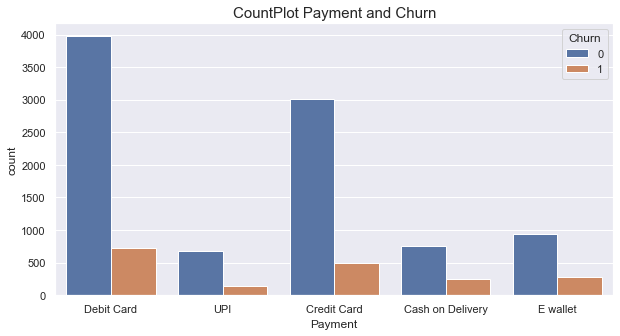

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(x=churn["Payment"],hue=churn['Churn'])
plt.title('CountPlot Payment and Churn',fontsize = 15);

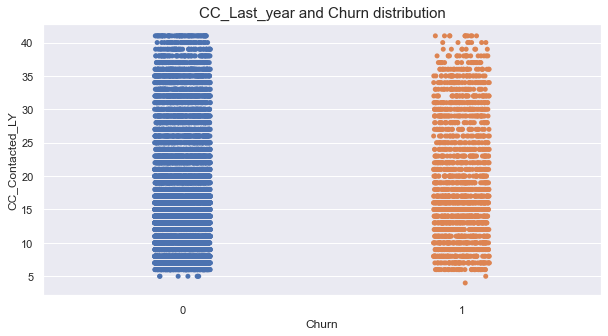

In [97]:
plt.figure(figsize=(10,5))
sns.stripplot(x = churn["Churn"], y=churn['CC_Contacted_LY'],data = churn)
plt.title('CC_Last_year and Churn distribution',fontsize = 15);

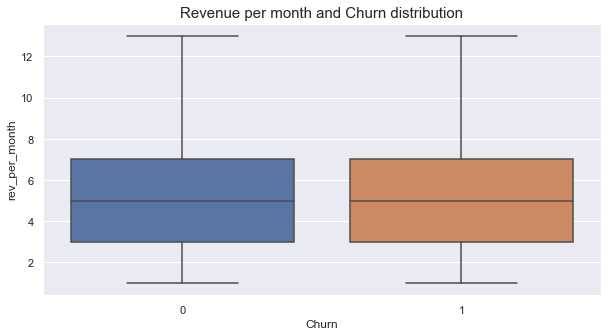

In [98]:
plt.figure(figsize=(10,5))
sns.boxplot(x = churn["Churn"], y=churn['rev_per_month'],data = churn)
plt.title('Revenue per month and Churn distribution',fontsize = 15);

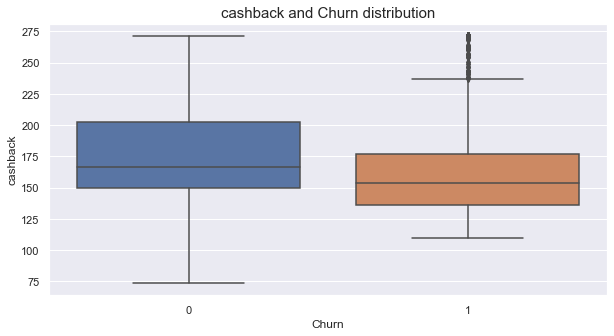

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(x = churn["Churn"], y=churn['cashback'],data = churn)
plt.title('cashback and Churn distribution',fontsize = 15);

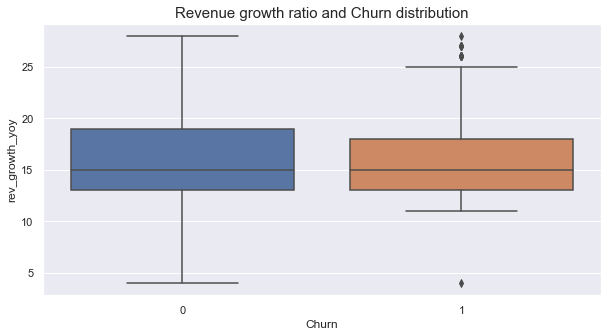

In [100]:
plt.figure(figsize=(10,5))
sns.boxplot(x = churn["Churn"], y=churn['rev_growth_yoy'],data = churn)
plt.title('Revenue growth ratio and Churn distribution',fontsize = 15);

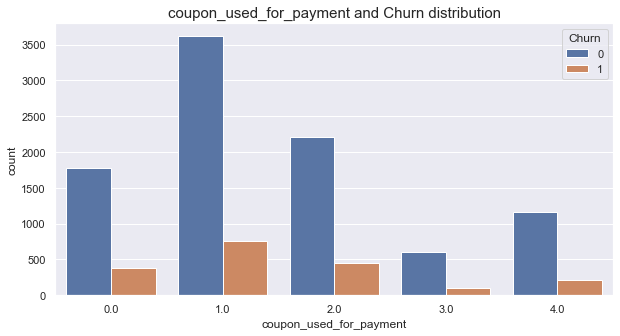

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(churn['coupon_used_for_payment'],hue=churn['Churn'])
plt.title('coupon_used_for_payment and Churn distribution',fontsize = 15);

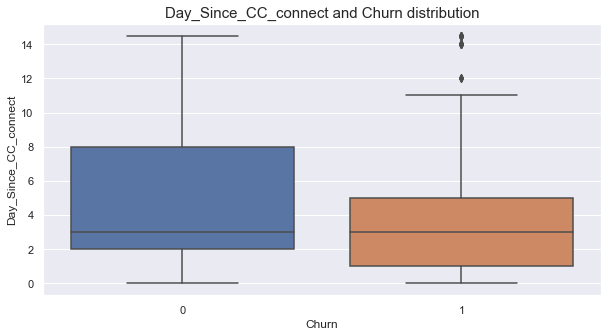

In [102]:
plt.figure(figsize=(10,5))
sns.boxplot(x = churn["Churn"], y=churn['Day_Since_CC_connect'],data = churn)
plt.title('Day_Since_CC_connect and Churn distribution',fontsize = 15);

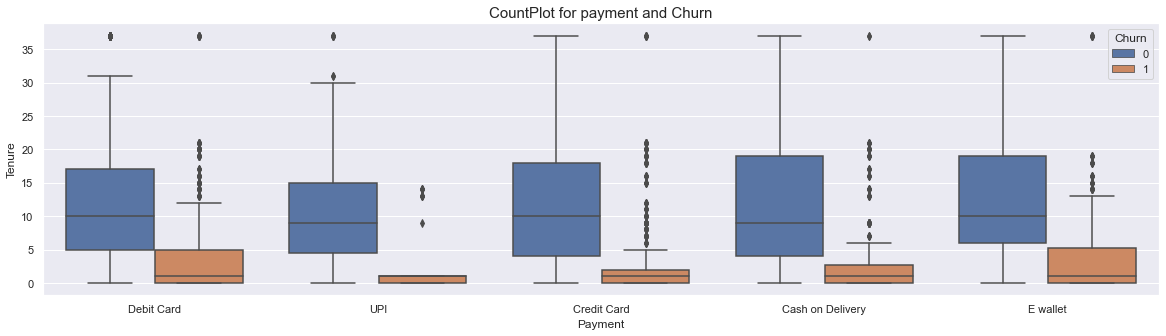

In [103]:
plt.figure(figsize=(20,5))
sns.boxplot(x=churn["Payment"],y=churn['Tenure'],hue=churn['Churn'])
plt.title('CountPlot for payment and Churn',fontsize = 15);

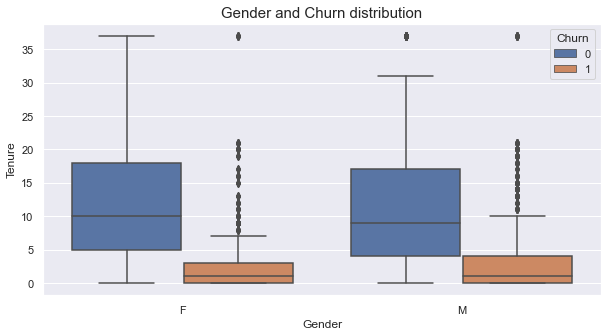

In [104]:
plt.figure(figsize=(10,5))
sns.boxplot(x = churn["Gender"], y=churn['Tenure'],hue= churn['Churn'])
plt.title('Gender and Churn distribution',fontsize = 15);

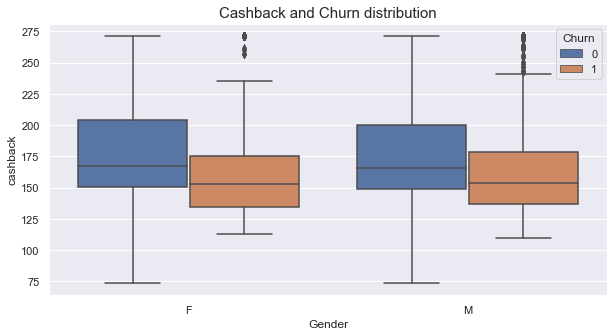

In [105]:
plt.figure(figsize=(10,5))
sns.boxplot(x = churn["Gender"], y=churn['cashback'],hue= churn['Churn'])
plt.title('Cashback and Churn distribution',fontsize = 15);

### Multi Variate Analysis

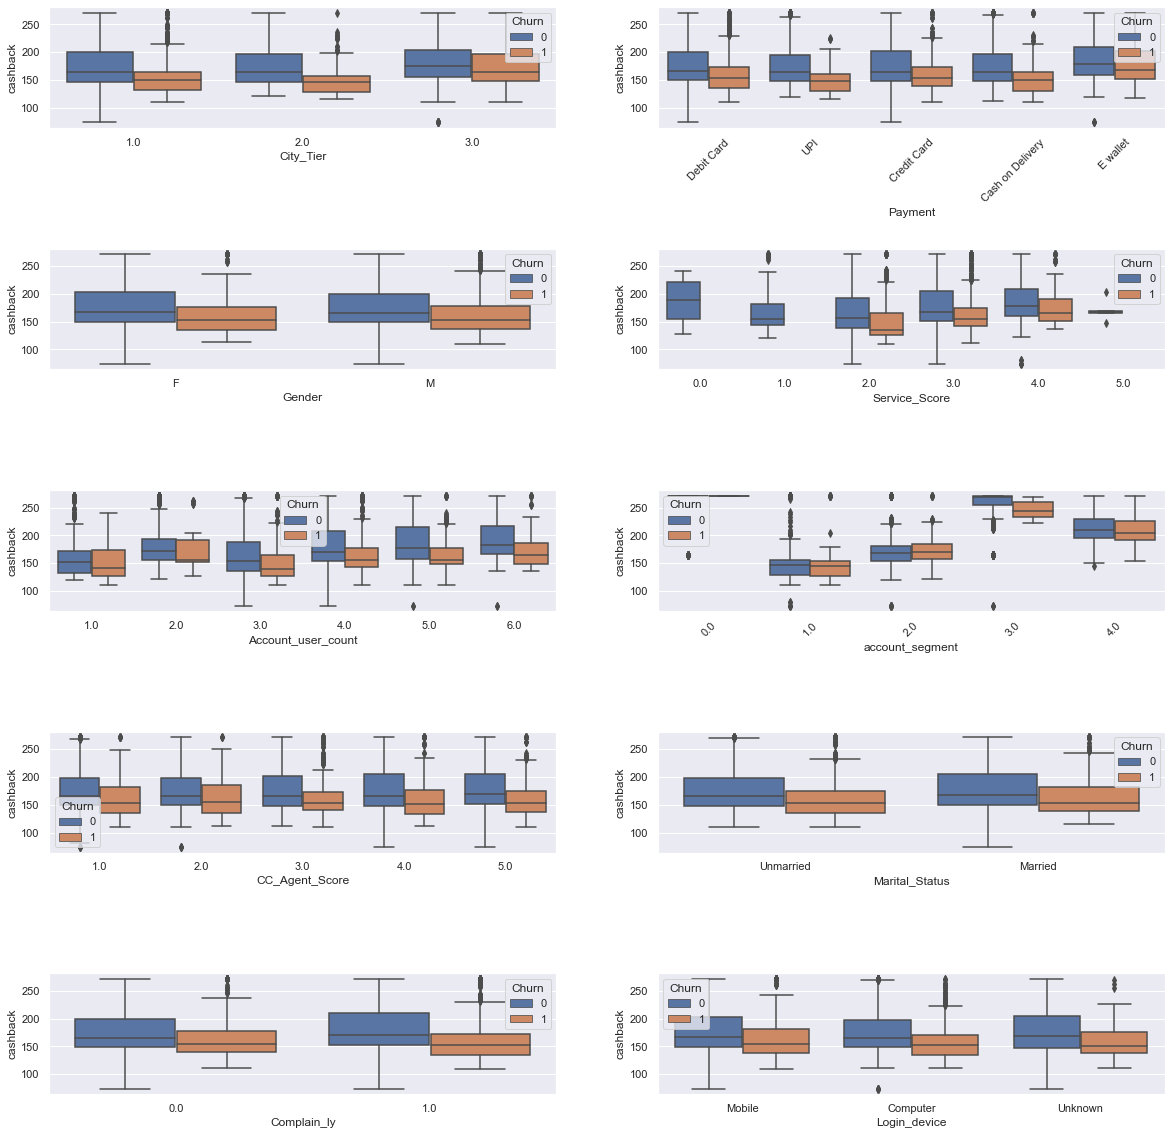

In [106]:

    
fig,ax =plt.subplots(5,2,figsize=(20,20))
fig.subplots_adjust(hspace=1)
for i in range(0,10):
    sns.boxplot(x = churn[cat].iloc[:,i], y=churn['cashback'],hue= churn['Churn'],ax=ax[divmod(i,2)])
    
for tick in ax[2,1].get_xticklabels():
    tick.set_rotation(45)
for tick in ax[0,1].get_xticklabels():
    tick.set_rotation(45)

    

In [107]:
cat

['City_Tier',
 'Payment',
 'Gender',
 'Service_Score',
 'Account_user_count',
 'account_segment',
 'CC_Agent_Score',
 'Marital_Status',
 'Complain_ly',
 'Login_device']

In [108]:
num

['Tenure',
 'CC_Contacted_LY',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']

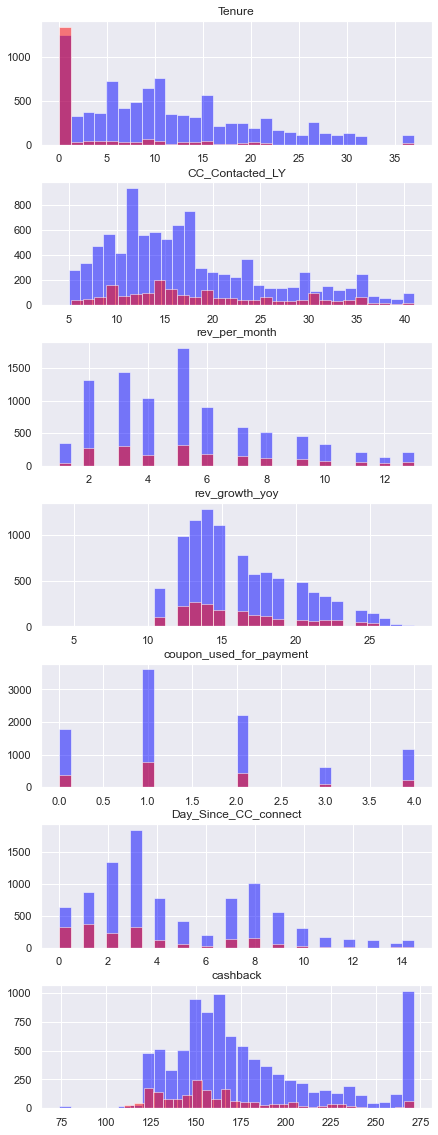

In [109]:
fig, ax = plt.subplots(7, 1, figsize=(7,20));
churn[churn.Churn == 0][num].hist(bins=30, color="blue", alpha=0.5, ax=ax);
churn[churn.Churn == 1][num].hist(bins=30, color="red", alpha=0.5, ax=ax);

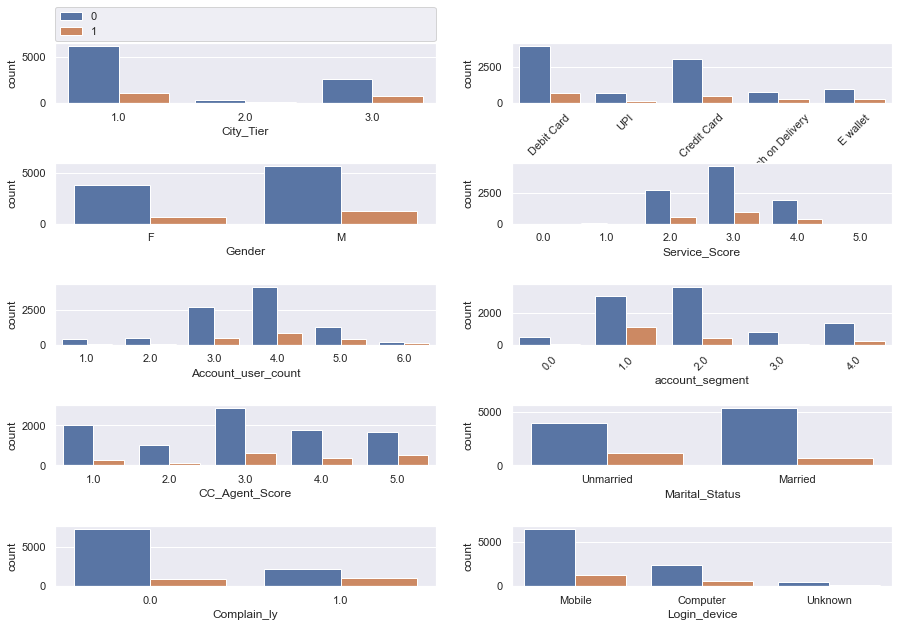

In [110]:
fig,ax =plt.subplots(5,2,figsize=(15,10))
fig.subplots_adjust(hspace=1)
for i in range(0,10):
    g = sns.countplot(x=churn[cat].iloc[:,i], hue=churn["Churn"], ax=ax[divmod(i,2)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[2,1].get_xticklabels():
    tick.set_rotation(45)
for tick in ax[0,1].get_xticklabels():
    tick.set_rotation(45)

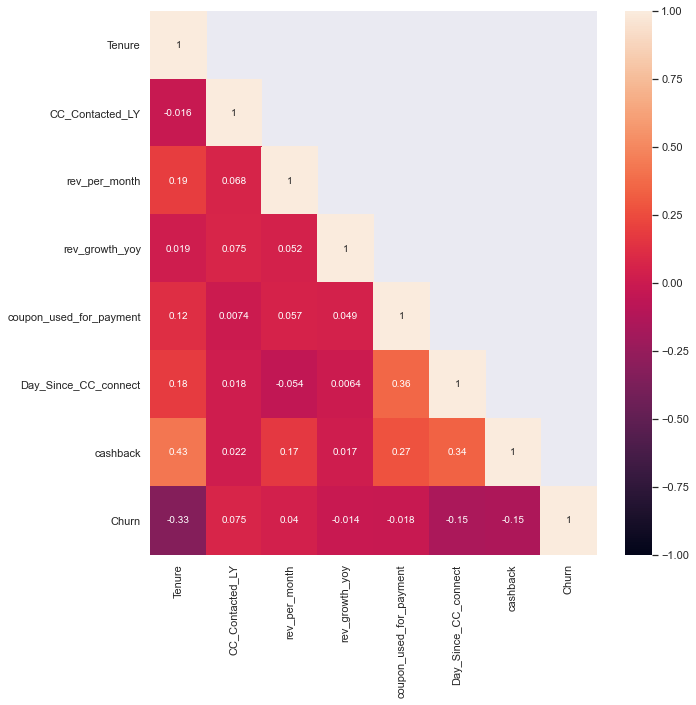

In [111]:


cor=churn[['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback','Churn']].corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(10,10))
sns.heatmap(cor, mask = mask, annot = True, vmin=-1, vmax=1);

If two features are correlated, the model only really needs one of them, as the second one does not add additional information and becomes redundant and can be dropped. Here no significant correlation can be observed between any numerical variables. So correlation cannot be used for feature selection because none of them are correlated with each other and only Tenure is negetively correlated with the target. Generally, variables should be correlated with the target but should be uncorrelated among themselves.



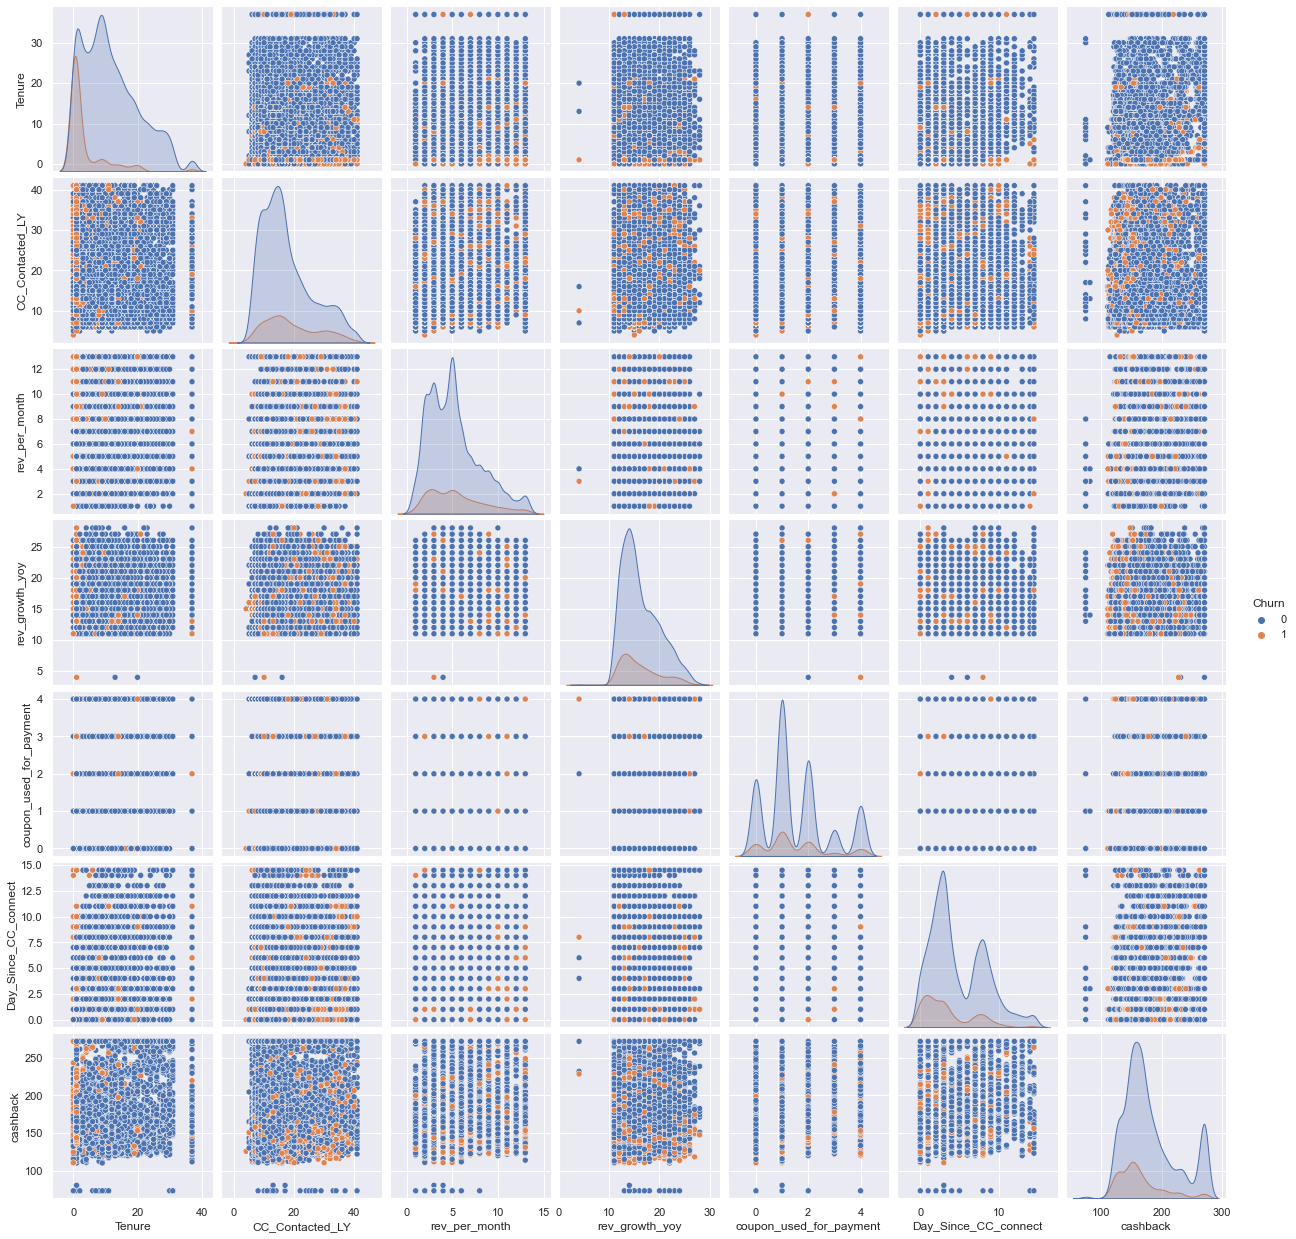

In [112]:
sns.pairplot(churn[['Tenure',
 'CC_Contacted_LY',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback','Churn']],hue='Churn',diag_kind='kde');

In [113]:
cat

['City_Tier',
 'Payment',
 'Gender',
 'Service_Score',
 'Account_user_count',
 'account_segment',
 'CC_Agent_Score',
 'Marital_Status',
 'Complain_ly',
 'Login_device']

In [114]:
for column in churn.columns:
    if churn[column].dtype == "object":
        print(column.upper(), ": ", churn[column].nunique())
        print(churn[column].value_counts())
        print("\n")
        print("*" * 55)
        print("\n")

PAYMENT :  5
Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


*******************************************************


GENDER :  2
M    6812
F    4448
Name: Gender, dtype: int64


*******************************************************


MARITAL_STATUS :  2
Married      6072
Unmarried    5188
Name: Marital_Status, dtype: int64


*******************************************************


LOGIN_DEVICE :  3
Mobile      7703
Computer    3018
Unknown      539
Name: Login_device, dtype: int64


*******************************************************




In [115]:
churn.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.00,3.00,6.00,Debit Card,F,3.00,3.00,2.00,2.00,Unmarried,9.00,1.00,11.00,1.00,5.00,159.93,Mobile
1,1,0.00,1.00,8.00,UPI,M,3.00,4.00,1.00,3.00,Unmarried,7.00,1.00,15.00,0.00,0.00,120.90,Mobile
2,1,0.00,1.00,30.00,Debit Card,M,2.00,4.00,1.00,3.00,Unmarried,6.00,1.00,14.00,0.00,3.00,165.25,Mobile
3,1,0.00,3.00,15.00,Debit Card,M,2.00,4.00,2.00,5.00,Unmarried,8.00,0.00,23.00,0.00,3.00,134.07,Mobile
4,1,0.00,1.00,12.00,Credit Card,M,2.00,3.00,1.00,5.00,Unmarried,3.00,0.00,11.00,1.00,3.00,129.60,Mobile


### Categorical Encoding

In [116]:
churn = pd.get_dummies(churn, columns=['Gender','Marital_Status','Login_device','Payment'],drop_first=True)

In [117]:
pd.set_option("display.max_columns", None)
churn.head().T

,0,1,2,3,4
Churn,1.00,1.00,1.00,1.00,1.00
Tenure,4.00,0.00,0.00,0.00,0.00
City_Tier,3.00,1.00,1.00,3.00,1.00
CC_Contacted_LY,6.00,8.00,30.00,15.00,12.00
Service_Score,3.00,3.00,2.00,2.00,2.00
Account_user_count,3.00,4.00,4.00,4.00,3.00
account_segment,2.00,1.00,1.00,2.00,1.00
CC_Agent_Score,2.00,3.00,3.00,5.00,5.00
rev_per_month,9.00,7.00,6.00,8.00,3.00
Complain_ly,1.00,1.00,1.00,0.00,0.00


In [118]:
churn.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'account_segment', 'CC_Agent_Score',
       'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Gender_M', 'Marital_Status_Unmarried', 'Login_device_Mobile',
       'Login_device_Unknown', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI'],
      dtype='object')

In [119]:
df_1 = churn.drop(['Churn','Complain_ly', 'Gender_M', 'Marital_Status_Unmarried', 'Login_device_Mobile',
       'Login_device_Unknown', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI'], axis = 1)

In [120]:
df_1.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,4.00,3.00,6.00,3.00,3.00,2.00,2.00,9.00,11.00,1.00,5.00,159.93
1,0.00,1.00,8.00,3.00,4.00,1.00,3.00,7.00,15.00,0.00,0.00,120.90
2,0.00,1.00,30.00,2.00,4.00,1.00,3.00,6.00,14.00,0.00,3.00,165.25
3,0.00,3.00,15.00,2.00,4.00,2.00,5.00,8.00,23.00,0.00,3.00,134.07
4,0.00,1.00,12.00,2.00,3.00,1.00,5.00,3.00,11.00,1.00,3.00,129.60


### Scaling

In [121]:
sc = StandardScaler()

In [122]:
scaled_df = pd.DataFrame(sc.fit_transform(df_1.iloc[:,0:12]),columns=df_1.columns[0:])

In [123]:
scaled_df.head().T

,0,1,2,3,4
Tenure,-0.70,-1.15,-1.15,-1.15,-1.15
City_Tier,1.48,-0.71,-0.71,1.48,-0.71
CC_Contacted_LY,-1.38,-1.15,1.42,-0.33,-0.68
Service_Score,0.13,0.13,-1.25,-1.25,-1.25
Account_user_count,-0.70,0.29,0.29,0.29,-0.70
account_segment,0.09,-0.82,-0.82,0.09,-0.82
CC_Agent_Score,-0.78,-0.05,-0.05,1.41,1.41
rev_per_month,1.30,0.61,0.26,0.95,-0.78
rev_growth_yoy,-1.38,-0.32,-0.58,1.81,-1.38
coupon_used_for_payment,-0.44,-1.26,-1.26,-1.26,-0.44


### Clustering Using K-Means Clustering

In [124]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
k_means.labels_

array([0, 0, 0, ..., 0, 1, 0])

In [125]:
k_means.inertia_

117976.4825964092

In [126]:
wss = []

In [127]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [128]:
wss

[135120.00000000038,
 117976.4825964092,
 109847.80875201318,
 104198.81573673824,
 99596.25352451563,
 96299.05589145418,
 92573.89432359098,
 90003.02147420208,
 87681.34084950788,
 85761.88653848361]

In [129]:
a=[1,2,3,4,5,6,7,8,9,10]

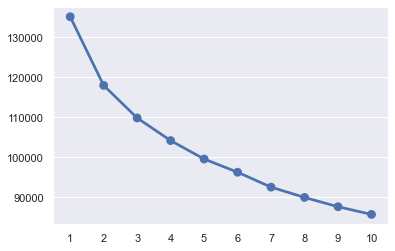

In [130]:
sns.pointplot(a, wss);

In [131]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [132]:
silhouette_score(scaled_df,labels,random_state=1)

0.13707741379924504

In [133]:
silhouette_samples(scaled_df,labels).min()

-0.12635270622566253

In [134]:
df_1["Clus_kmeans"] = labels
df_1.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Clus_kmeans
0,4.00,3.00,6.00,3.00,3.00,2.00,2.00,9.00,11.00,1.00,5.00,159.93,0
1,0.00,1.00,8.00,3.00,4.00,1.00,3.00,7.00,15.00,0.00,0.00,120.90,0
2,0.00,1.00,30.00,2.00,4.00,1.00,3.00,6.00,14.00,0.00,3.00,165.25,0
3,0.00,3.00,15.00,2.00,4.00,2.00,5.00,8.00,23.00,0.00,3.00,134.07,0
4,0.00,1.00,12.00,2.00,3.00,1.00,5.00,3.00,11.00,1.00,3.00,129.60,0


In [135]:
df_1.Clus_kmeans.value_counts().sort_index()

0    6591
1    4669
Name: Clus_kmeans, dtype: int64

In [136]:

clust_profile=df_1.groupby('Clus_kmeans').mean()
clust_profile['freq']=df_1.Clus_kmeans.value_counts().sort_index()
clust_profile.T

Clus_kmeans,0,1
Tenure,6.71,15.24
City_Tier,1.55,1.78
CC_Contacted_LY,17.36,18.45
Service_Score,2.79,3.07
Account_user_count,3.58,3.89
account_segment,1.42,2.57
CC_Agent_Score,3.07,3.07
rev_per_month,4.78,5.91
rev_growth_yoy,16.05,16.40
coupon_used_for_payment,1.09,2.17


Here it can be noticed that Among the two clusters, 1'st cluster has high tenure, high cashback, high values for service scores scores, and more rev_per_month when compared to the 2'nd cluster. May be these accounts from 1'st cluster are those which are not churning and the accounts from the 2'nd cluster have a probability of churning. Based on further analysis separate marketing strategies can be planned for both the clusters separately, so that 1'st cluster customers will be even more satisfied with the servises and 2'nd cluster churning could be avoided.

### 1). Model building and interpretation.

### a. Build various models 
### b. Test the predictive models against the test set using various appropriate performance metrics

### Extracting the target column into separate vectors for training set and test set

In [137]:
churn.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Gender_M,Marital_Status_Unmarried,Login_device_Mobile,Login_device_Unknown,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI
0,1,4.00,3.00,6.00,3.00,3.00,2.00,2.00,9.00,1.00,11.00,1.00,5.00,159.93,0,1,1,0,0,1,0,0
1,1,0.00,1.00,8.00,3.00,4.00,1.00,3.00,7.00,1.00,15.00,0.00,0.00,120.90,1,1,1,0,0,0,0,1
2,1,0.00,1.00,30.00,2.00,4.00,1.00,3.00,6.00,1.00,14.00,0.00,3.00,165.25,1,1,1,0,0,1,0,0
3,1,0.00,3.00,15.00,2.00,4.00,2.00,5.00,8.00,0.00,23.00,0.00,3.00,134.07,1,1,1,0,0,1,0,0
4,1,0.00,1.00,12.00,2.00,3.00,1.00,5.00,3.00,0.00,11.00,1.00,3.00,129.60,1,1,1,0,1,0,0,0


In [138]:
X = churn.drop("Churn", axis=1)

y = churn.pop("Churn")

X.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Gender_M,Marital_Status_Unmarried,Login_device_Mobile,Login_device_Unknown,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI
0,4.00,3.00,6.00,3.00,3.00,2.00,2.00,9.00,1.00,11.00,1.00,5.00,159.93,0,1,1,0,0,1,0,0
1,0.00,1.00,8.00,3.00,4.00,1.00,3.00,7.00,1.00,15.00,0.00,0.00,120.90,1,1,1,0,0,0,0,1
2,0.00,1.00,30.00,2.00,4.00,1.00,3.00,6.00,1.00,14.00,0.00,3.00,165.25,1,1,1,0,0,1,0,0
3,0.00,3.00,15.00,2.00,4.00,2.00,5.00,8.00,0.00,23.00,0.00,3.00,134.07,1,1,1,0,0,1,0,0
4,0.00,1.00,12.00,2.00,3.00,1.00,5.00,3.00,0.00,11.00,1.00,3.00,129.60,1,1,1,0,1,0,0,0


In [139]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.30,random_state=42,stratify = y)

In [140]:
y_train.value_counts(normalize=True)

0   0.83
1   0.17
Name: Churn, dtype: float64

In [141]:
y_test.value_counts(normalize=True)

0   0.83
1   0.17
Name: Churn, dtype: float64

In [142]:
X_train.head().T

,1813,1586,840,8939,6207
Tenure,25.00,5.00,0.00,7.00,3.00
City_Tier,1.00,3.00,1.00,3.00,3.00
CC_Contacted_LY,12.00,32.00,25.00,14.00,20.00
Service_Score,3.00,3.00,3.00,3.00,3.00
Account_user_count,3.00,3.00,3.00,2.00,3.00
account_segment,2.00,2.00,1.00,2.00,4.00
CC_Agent_Score,5.00,1.00,2.00,5.00,3.00
rev_per_month,4.00,1.00,4.00,7.00,9.00
Complain_ly,1.00,0.00,0.00,0.00,0.00
rev_growth_yoy,12.00,18.00,11.00,23.00,12.00


In [143]:
X_test.head().T

,2191,820,4224,6703,4318
Tenure,8.00,23.00,10.00,6.00,14.00
City_Tier,1.00,1.00,1.00,3.00,3.00
CC_Contacted_LY,8.00,34.00,15.00,25.00,11.00
Service_Score,2.00,2.00,3.00,2.00,4.00
Account_user_count,4.00,3.00,4.00,3.00,5.00
account_segment,4.00,3.00,4.00,2.00,4.00
CC_Agent_Score,4.00,5.00,3.00,1.00,1.00
rev_per_month,3.00,5.00,3.00,4.00,9.00
Complain_ly,0.00,1.00,0.00,1.00,0.00
rev_growth_yoy,18.00,11.00,14.00,27.00,12.00


It can be observed that both train and test has same ratio of churn and not_churn accounts. Observations are  equally distributed between the train and test sets with regards to target classes

### Decision Tree Classifier



Here initially for all models we are doing base models without any paremeter tuning, next we are doing the model using hyper parameter tuning and them we are providing data Balance using SMOTE technique and see if the model performance has increased or not. Finall we will also drop few variables as per feature importance scores and again check if the model performance has inproved.



### Base Model Without Hyper Parameter Tuning

In [144]:
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=42) 

In [145]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Predicting on Training and Test dataset

### Feature Importance

In [146]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                          Imp
Tenure                   0.30
Day_Since_CC_connect     0.09
cashback                 0.08
CC_Agent_Score           0.06
rev_per_month            0.06
Complain_ly              0.06
CC_Contacted_LY          0.06
rev_growth_yoy           0.05
City_Tier                0.04
Marital_Status_Unmarried 0.03
account_segment          0.03
Account_user_count       0.03
Login_device_Mobile      0.02
Service_Score            0.02
Payment_Debit Card       0.02
Gender_M                 0.01
coupon_used_for_payment  0.01
Payment_Credit Card      0.01
Payment_E wallet         0.01
Payment_UPI              0.01
Login_device_Unknown     0.01


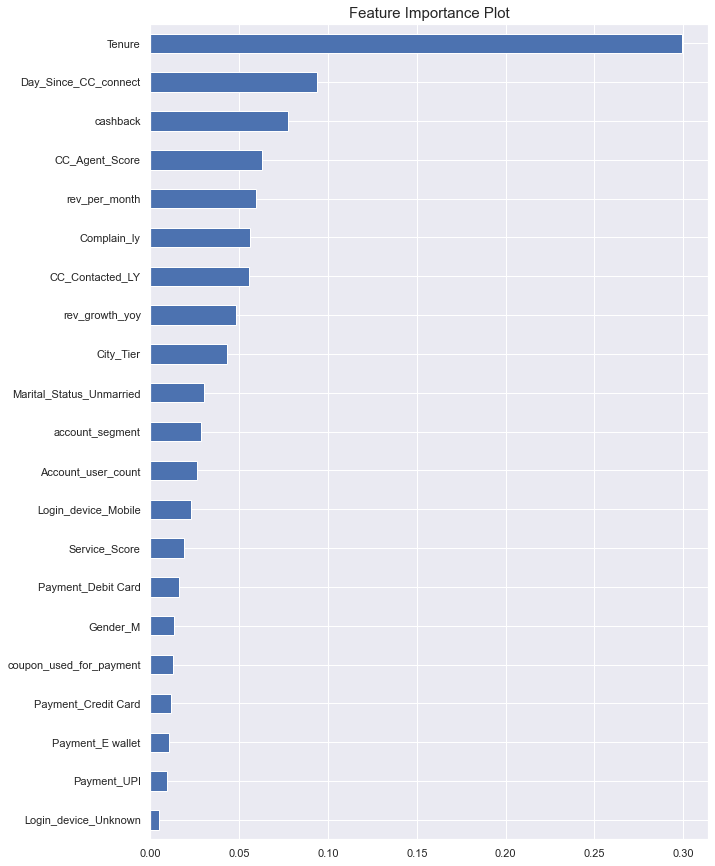

In [147]:
plt.figure(figsize=(10,15))
pd.Series(dt_model.feature_importances_, index=X.columns).sort_values().plot(kind='barh')
plt.title('Feature Importance Plot',fontsize = 15);

### Predicting on Train and Test Data

In [148]:
## Performance Matrix on train data set
y_train_predict = dt_model.predict(X_train)
model_score = dt_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6555    0]
 [   0 1327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [149]:
## Performance Matrix on test data set
y_test_predict = dt_model.predict(X_test)
model_score = dt_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9357608052101836
[[2704  105]
 [ 112  457]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2809
           1       0.81      0.80      0.81       569

    accuracy                           0.94      3378
   macro avg       0.89      0.88      0.88      3378
weighted avg       0.94      0.94      0.94      3378



### AUC and ROC for the training & test data

In [150]:
# Training Data Probability Prediction
pred_prob_train = dt_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = dt_model.predict_proba(X_test)

In [151]:
plt.style.use('classic')
plt.figure(figsize=(10,15))

<Figure size 800x1200 with 0 Axes>

<Figure size 800x1200 with 0 Axes>

AUC for the Training Data: 1.000
AUC for the Test Data: 0.883


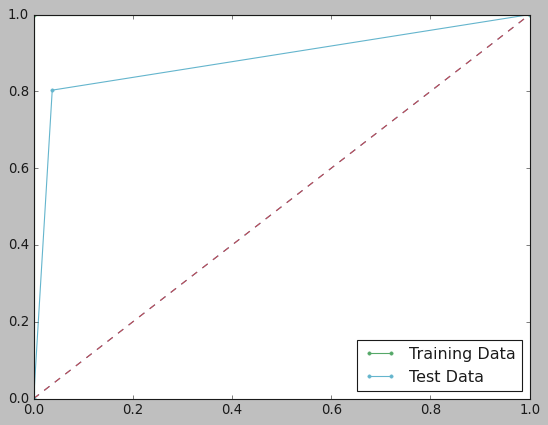

In [152]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Regularising the Decision Tree

### Adding Tuning Parameters

Here we are doing parameter tuning to see if the metrics will improve Further.

In [200]:
grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [8,9,10],
    'min_samples_leaf': [10,15,20], 
    'min_samples_split': [30,45,60],
}

model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)

In [201]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 9, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [30, 45, 60]})

In [202]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 45} 

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=45,
                       random_state=42)


In [203]:
best_model = grid_search.best_estimator_

### Predicting on Training and Test dataset

In [204]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(X_train)
model_score = best_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9247652879979701
[[6330  225]
 [ 368  959]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6555
           1       0.81      0.72      0.76      1327

    accuracy                           0.92      7882
   macro avg       0.88      0.84      0.86      7882
weighted avg       0.92      0.92      0.92      7882



In [205]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9023090586145648
[[2680  129]
 [ 201  368]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2809
           1       0.74      0.65      0.69       569

    accuracy                           0.90      3378
   macro avg       0.84      0.80      0.82      3378
weighted avg       0.90      0.90      0.90      3378



### ROC AUC CURVE

In [206]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(X_test)

AUC for the Training Data: 0.952
AUC for the Test Data: 0.914


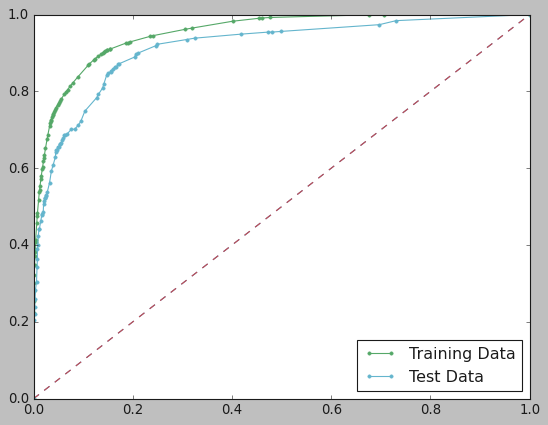

In [207]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Here it can be observed that after parameter tuning the model is valid with not much difference between the accuracies of train and test sets. But remaining metrics like recall, precision and f1-score for minority class has decreased when compared to base model. In that sense base model is giving better performance.


### SMOTE FOR DATA IMBALANCE

**SMOTE is only applied on the train data set**
Here smote is used on base model since its given better results

In [208]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [209]:
## Let's check the shape after SMOTE
X_train_res.shape

(13110, 21)

In [210]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


After OverSampling, counts of label '1': 6555
After OverSampling, counts of label '0': 6555


In [215]:
dt_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

In [216]:
## Performance Matrix on train data set with SMOTE
y_train_predict = dt_model.predict(X_train_res)
model_score = dt_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

1.0
[[6555    0]
 [   0 6555]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110



In [217]:
## Performance Matrix on test data set
y_test_predict = dt_model.predict(X_test)
model_score = dt_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9298401420959147
[[2679  130]
 [ 107  462]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2809
           1       0.78      0.81      0.80       569

    accuracy                           0.93      3378
   macro avg       0.87      0.88      0.88      3378
weighted avg       0.93      0.93      0.93      3378



It can be noticed that not much improvement is there by using smote. The results are same as that of Base model only. Now checking the model again after dropping few variables like Gender, Login device etc from feature importance.

### PREDICTING AFTER DROPPING IRRELEVANT VARIABLES

In [218]:
X_test.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'account_segment', 'CC_Agent_Score',
       'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Gender_M', 'Marital_Status_Unmarried', 'Login_device_Mobile',
       'Login_device_Unknown', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI'],
      dtype='object')

In [219]:
dt_train = X_train.drop(['Gender_M', 'Marital_Status_Unmarried', 'Login_device_Mobile',
       'Login_device_Unknown', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI','City_Tier','Service_Score'], axis = 1)

In [220]:
dt_test = X_test.drop(['Gender_M', 'Marital_Status_Unmarried', 'Login_device_Mobile',
       'Login_device_Unknown', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI','City_Tier','Service_Score'], axis = 1)

In [221]:
dt = DecisionTreeClassifier(criterion = 'gini',random_state=42) 

In [222]:
best_model.fit(dt_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=45,
                       random_state=42)

In [223]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(dt_train)
model_score = best_model.score(dt_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9132199949251459
[[6344  211]
 [ 473  854]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6555
           1       0.80      0.64      0.71      1327

    accuracy                           0.91      7882
   macro avg       0.87      0.81      0.83      7882
weighted avg       0.91      0.91      0.91      7882



In [224]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(dt_test)
model_score = best_model.score(dt_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9002368265245707
[[2696  113]
 [ 224  345]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.75      0.61      0.67       569

    accuracy                           0.90      3378
   macro avg       0.84      0.78      0.81      3378
weighted avg       0.89      0.90      0.90      3378



IT Can be noticed that the performance is same as that of base model only without much improvement even after feature selection.

##  Build classification model  Random Forest

### Base Model Without Hyper Parameter Tuning

In [225]:
rfcl = RandomForestClassifier(n_estimators = 101, max_features = 4, random_state=42)
rfcl = rfcl.fit(X_train, y_train)

In [226]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                          Imp
Tenure                   0.25
cashback                 0.09
CC_Contacted_LY          0.07
Day_Since_CC_connect     0.07
rev_growth_yoy           0.06
Complain_ly              0.06
rev_per_month            0.06
CC_Agent_Score           0.05
account_segment          0.04
Account_user_count       0.04
coupon_used_for_payment  0.03
City_Tier                0.02
Marital_Status_Unmarried 0.02
Service_Score            0.02
Login_device_Mobile      0.02
Gender_M                 0.02
Payment_Credit Card      0.02
Payment_Debit Card       0.02
Payment_E wallet         0.01
Payment_UPI              0.01
Login_device_Unknown     0.00


### Predicting on Training and Test dataset

In [227]:
## Performance Matrix on train data set
y_train_predict = rfcl.predict(X_train)
model_score = rfcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6555    0]
 [   0 1327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [228]:
## Performance Matrix on test data set
y_test_predict = rfcl.predict(X_test)
model_score = rfcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9621077560686797
[[2785   24]
 [ 104  465]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2809
           1       0.95      0.82      0.88       569

    accuracy                           0.96      3378
   macro avg       0.96      0.90      0.93      3378
weighted avg       0.96      0.96      0.96      3378



### AUC Score and ROC Curve

In [229]:
# Training Data Probability Prediction
pred_prob_train = rfcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = rfcl.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.990


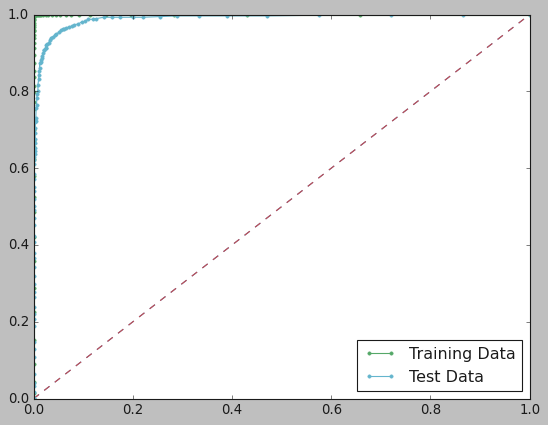

In [230]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Adding Tuning Parameters

In [231]:
grid = {
    'max_depth': [5,7,10],
    'max_features': [6,8,10],
    'min_samples_split': [50,100],
    'n_estimators': [101,151],
    'criterion' : ['gini','entropy']
}

rfcl = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfcl, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')

In [232]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10], 'max_features': [6, 8, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [101, 151]},
             scoring='f1')

In [233]:
best_model = grid_search.best_estimator_

### Predicting on Training and Test dataset

In [234]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(X_train)
model_score = best_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.931743212382644
[[6432  123]
 [ 415  912]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6555
           1       0.88      0.69      0.77      1327

    accuracy                           0.93      7882
   macro avg       0.91      0.83      0.87      7882
weighted avg       0.93      0.93      0.93      7882



In [235]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9147424511545293
[[2730   79]
 [ 209  360]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2809
           1       0.82      0.63      0.71       569

    accuracy                           0.91      3378
   macro avg       0.87      0.80      0.83      3378
weighted avg       0.91      0.91      0.91      3378



### AUC ROC CURVE

In [236]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(X_test)

AUC for the Training Data: 0.974
AUC for the Test Data: 0.955


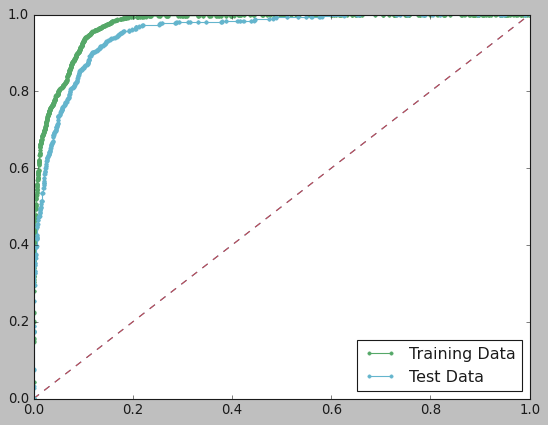

In [237]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


### SMOTE FOR DATA IMBALANCE

In [245]:
rfcl.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

### Predicting on Training and Test dataset

In [246]:
## Performance Matrix on train data set with SMOTE
y_train_predict = rfcl.predict(X_train_res)
model_score = rfcl.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

1.0
[[6555    0]
 [   0 6555]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110



In [247]:
## Performance Matrix on test data set
y_test_predict = rfcl.predict(X_test)
model_score = rfcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9665482534043813
[[2773   36]
 [  77  492]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.93      0.86      0.90       569

    accuracy                           0.97      3378
   macro avg       0.95      0.93      0.94      3378
weighted avg       0.97      0.97      0.97      3378



Among all the models of random forrest, SMOTe applied on base model is giving best results. Lets drop the irrelevant features and check again with random Forrest

### Dropping unwanted Features

In [248]:
rf_train = X_train.drop(['Gender_M', 'Marital_Status_Unmarried', 'Login_device_Mobile',
       'Login_device_Unknown', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI','City_Tier','Service_Score'], axis = 1)

In [249]:
rf_test = X_test.drop(['Gender_M', 'Marital_Status_Unmarried', 'Login_device_Mobile',
       'Login_device_Unknown', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI','City_Tier','Service_Score'], axis = 1)

In [250]:
rf = RandomForestClassifier(n_estimators = 101, max_features = 4, random_state=42)
rf = rfcl.fit(rf_train, y_train)

In [251]:
## Performance Matrix on train data set
y_train_predict = rf.predict(rf_train)
model_score = rf.score(rf_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6555    0]
 [   0 1327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [252]:
## Performance Matrix on test data set
y_test_predict = rf.predict(rf_test)
model_score = rf.score(rf_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9428656009473061
[[2765   44]
 [ 149  420]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2809
           1       0.91      0.74      0.81       569

    accuracy                           0.94      3378
   macro avg       0.93      0.86      0.89      3378
weighted avg       0.94      0.94      0.94      3378



Not much Difference or improvement from SMOTE model even after dropping unwanted features

##  Build classification model - Artificial Neural Network

### Scaling the variables

In [253]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [254]:
#Scale the training data and transform the test

x_train_ann = sc.fit_transform(X_train)
x_test_ann = sc.transform(X_test)

### Base model without Parameter tuning

In [255]:
clf = MLPClassifier(hidden_layer_sizes=6, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=42, tol=0.001, n_iter_no_change=1000)

In [256]:
# Fit the model on the training data
clf.fit(x_train_ann, y_train)

Iteration 1, loss = 0.55432692
Iteration 2, loss = 0.51793444
Iteration 3, loss = 0.49248914
Iteration 4, loss = 0.47491858
Iteration 5, loss = 0.46187723
Iteration 6, loss = 0.45172261
Iteration 7, loss = 0.44347653
Iteration 8, loss = 0.43659595
Iteration 9, loss = 0.43069057
Iteration 10, loss = 0.42545689
Iteration 11, loss = 0.42073590
Iteration 12, loss = 0.41651048
Iteration 13, loss = 0.41272821
Iteration 14, loss = 0.40921149
Iteration 15, loss = 0.40591590
Iteration 16, loss = 0.40290831
Iteration 17, loss = 0.40004104
Iteration 18, loss = 0.39731419
Iteration 19, loss = 0.39471406
Iteration 20, loss = 0.39224988
Iteration 21, loss = 0.38990585
Iteration 22, loss = 0.38765948
Iteration 23, loss = 0.38552661
Iteration 24, loss = 0.38347704
Iteration 25, loss = 0.38149358
Iteration 26, loss = 0.37955135
Iteration 27, loss = 0.37769944
Iteration 28, loss = 0.37588740
Iteration 29, loss = 0.37411582
Iteration 30, loss = 0.37240201
Iteration 31, loss = 0.37071354
Iteration 32, los

Iteration 256, loss = 0.28714192
Iteration 257, loss = 0.28705003
Iteration 258, loss = 0.28696178
Iteration 259, loss = 0.28686529
Iteration 260, loss = 0.28676935
Iteration 261, loss = 0.28669772
Iteration 262, loss = 0.28660301
Iteration 263, loss = 0.28651512
Iteration 264, loss = 0.28644474
Iteration 265, loss = 0.28635749
Iteration 266, loss = 0.28624882
Iteration 267, loss = 0.28617376
Iteration 268, loss = 0.28608233
Iteration 269, loss = 0.28601621
Iteration 270, loss = 0.28591028
Iteration 271, loss = 0.28583994
Iteration 272, loss = 0.28574140
Iteration 273, loss = 0.28565475
Iteration 274, loss = 0.28556790
Iteration 275, loss = 0.28549448
Iteration 276, loss = 0.28540475
Iteration 277, loss = 0.28531868
Iteration 278, loss = 0.28521838
Iteration 279, loss = 0.28512718
Iteration 280, loss = 0.28506343
Iteration 281, loss = 0.28495090
Iteration 282, loss = 0.28490032
Iteration 283, loss = 0.28481551
Iteration 284, loss = 0.28473398
Iteration 285, loss = 0.28460567
Iteration 

Iteration 512, loss = 0.26944287
Iteration 513, loss = 0.26939752
Iteration 514, loss = 0.26937078
Iteration 515, loss = 0.26931617
Iteration 516, loss = 0.26928061
Iteration 517, loss = 0.26922479
Iteration 518, loss = 0.26917633
Iteration 519, loss = 0.26915405
Iteration 520, loss = 0.26907194
Iteration 521, loss = 0.26905076
Iteration 522, loss = 0.26901422
Iteration 523, loss = 0.26897234
Iteration 524, loss = 0.26891474
Iteration 525, loss = 0.26887824
Iteration 526, loss = 0.26884694
Iteration 527, loss = 0.26880442
Iteration 528, loss = 0.26874249
Iteration 529, loss = 0.26871037
Iteration 530, loss = 0.26866243
Iteration 531, loss = 0.26861565
Iteration 532, loss = 0.26859557
Iteration 533, loss = 0.26850639
Iteration 534, loss = 0.26846098
Iteration 535, loss = 0.26844280
Iteration 536, loss = 0.26842770
Iteration 537, loss = 0.26835595
Iteration 538, loss = 0.26837418
Iteration 539, loss = 0.26830741
Iteration 540, loss = 0.26824330
Iteration 541, loss = 0.26821302
Iteration 

Iteration 763, loss = 0.26136884
Iteration 764, loss = 0.26136162
Iteration 765, loss = 0.26127247
Iteration 766, loss = 0.26124405
Iteration 767, loss = 0.26126885
Iteration 768, loss = 0.26123148
Iteration 769, loss = 0.26119390
Iteration 770, loss = 0.26117123
Iteration 771, loss = 0.26119883
Iteration 772, loss = 0.26113805
Iteration 773, loss = 0.26112654
Iteration 774, loss = 0.26110667
Iteration 775, loss = 0.26108238
Iteration 776, loss = 0.26104388
Iteration 777, loss = 0.26105072
Iteration 778, loss = 0.26101098
Iteration 779, loss = 0.26098276
Iteration 780, loss = 0.26096437
Iteration 781, loss = 0.26098763
Iteration 782, loss = 0.26091972
Iteration 783, loss = 0.26094846
Iteration 784, loss = 0.26089590
Iteration 785, loss = 0.26088061
Iteration 786, loss = 0.26083198
Iteration 787, loss = 0.26081788
Iteration 788, loss = 0.26083288
Iteration 789, loss = 0.26079649
Iteration 790, loss = 0.26074977
Iteration 791, loss = 0.26075081
Iteration 792, loss = 0.26073742
Iteration 

Iteration 1015, loss = 0.25546477
Iteration 1016, loss = 0.25542660
Iteration 1017, loss = 0.25543293
Iteration 1018, loss = 0.25538991
Iteration 1019, loss = 0.25544036
Iteration 1020, loss = 0.25539176
Iteration 1021, loss = 0.25537102
Iteration 1022, loss = 0.25532505
Iteration 1023, loss = 0.25531296
Iteration 1024, loss = 0.25528273
Iteration 1025, loss = 0.25527535
Iteration 1026, loss = 0.25526144
Iteration 1027, loss = 0.25518575
Iteration 1028, loss = 0.25513934
Iteration 1029, loss = 0.25517237
Iteration 1030, loss = 0.25511176
Iteration 1031, loss = 0.25508616
Iteration 1032, loss = 0.25506037
Iteration 1033, loss = 0.25501871
Iteration 1034, loss = 0.25500160
Iteration 1035, loss = 0.25496719
Iteration 1036, loss = 0.25492844
Iteration 1037, loss = 0.25490983
Iteration 1038, loss = 0.25489399
Iteration 1039, loss = 0.25483373
Iteration 1040, loss = 0.25479850
Iteration 1041, loss = 0.25472770
Iteration 1042, loss = 0.25472163
Iteration 1043, loss = 0.25470048
Iteration 1044

MLPClassifier(hidden_layer_sizes=6, max_iter=5000, n_iter_no_change=1000,
              random_state=42, solver='sgd', tol=0.001, verbose=True)

### Performance on train and test data

In [257]:
## Performance Matrix on train data set
y_train_predict = clf.predict(x_train_ann)
model_score = clf.score(x_train_ann, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9007866023851814
[[6354  201]
 [ 581  746]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6555
           1       0.79      0.56      0.66      1327

    accuracy                           0.90      7882
   macro avg       0.85      0.77      0.80      7882
weighted avg       0.89      0.90      0.89      7882



In [258]:
## Performance Matrix on test data set
y_test_predict = clf.predict(x_test_ann)
model_score = clf.score(x_test_ann, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8969804618117229
[[2709  100]
 [ 248  321]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.76      0.56      0.65       569

    accuracy                           0.90      3378
   macro avg       0.84      0.76      0.79      3378
weighted avg       0.89      0.90      0.89      3378



### ROC SCORE AUC CURVE

In [259]:
# Training Data Probability Prediction
pred_prob_train = clf.predict_proba(x_train_ann)

# Test Data Probability Prediction
pred_prob_test = clf.predict_proba(x_test_ann)

AUC for the Training Data: 0.911
AUC for the Test Data: 0.905


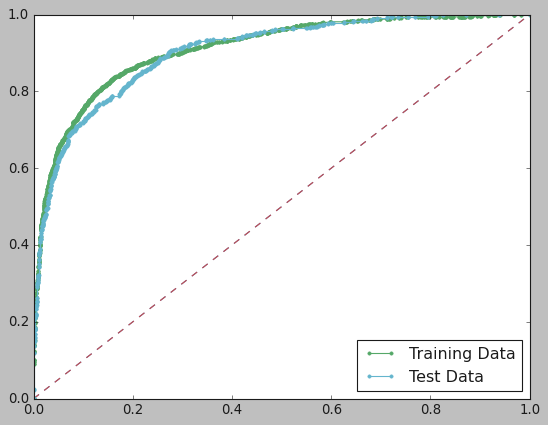

In [260]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Hyper Parameter tuning

In [261]:
grid = {
    'hidden_layer_sizes': [80,100,130],
    'max_iter': [4000,5000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01,0.1],
    'activation': ['logistic', 'relu'],
}

nncl = MLPClassifier(random_state=42)

grid_search = GridSearchCV(estimator = nncl, param_grid = grid, cv = 3)

In [262]:
grid_search.fit(x_train_ann, y_train)
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 80,
 'max_iter': 4000,
 'solver': 'adam',
 'tol': 0.01}

In [263]:
best_model = grid_search.best_estimator_

### Predicting on Training and Test dataset

In [264]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(x_train_ann)
model_score = best_model.score(x_train_ann, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9028165440243593
[[6395  160]
 [ 606  721]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6555
           1       0.82      0.54      0.65      1327

    accuracy                           0.90      7882
   macro avg       0.87      0.76      0.80      7882
weighted avg       0.90      0.90      0.89      7882



In [266]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(x_test_ann)
model_score = best_model.score(x_test_ann, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8978685612788633
[[2732   77]
 [ 268  301]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2809
           1       0.80      0.53      0.64       569

    accuracy                           0.90      3378
   macro avg       0.85      0.75      0.79      3378
weighted avg       0.89      0.90      0.89      3378




### SMOTE FOR DATA IMBALANCE

In [267]:
X_train_res_ann, y_train_res_ann = sm.fit_sample(x_train_ann, y_train.ravel())

In [268]:
best_model.fit(X_train_res_ann, y_train_res_ann)

MLPClassifier(hidden_layer_sizes=80, max_iter=4000, random_state=42, tol=0.01)

### Predicting on Training and Test dataset

In [269]:
## Performance Matrix on train data set with SMOTE
y_train_predict = best_model.predict(X_train_res_ann)
model_score = best_model.score(X_train_res_ann, y_train_res_ann)
print(model_score)
print(metrics.confusion_matrix(y_train_res_ann, y_train_predict))
print(metrics.classification_report(y_train_res_ann ,y_train_predict))

0.9139588100686499
[[5864  691]
 [ 437 6118]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      6555
           1       0.90      0.93      0.92      6555

    accuracy                           0.91     13110
   macro avg       0.91      0.91      0.91     13110
weighted avg       0.91      0.91      0.91     13110



In [270]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(x_test_ann)
model_score = best_model.score(x_test_ann, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8750740082889283
[[2483  326]
 [  96  473]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2809
           1       0.59      0.83      0.69       569

    accuracy                           0.88      3378
   macro avg       0.78      0.86      0.81      3378
weighted avg       0.90      0.88      0.88      3378



ANN model is giving a valid model without any overfit but its performance is lagging when compared to Random Forrest and CART models, It is overfitting after SMOTE

### LOGISTIC REGRESSION

### Base Model without Hyper parameter tuning

In [271]:
# Fit the Logistic Regression model
lg = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='l2',verbose=True, n_jobs=2,random_state=42)
lg.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, random_state=42,
                   solver='newton-cg', verbose=True)

### Predicting on Training and Test dataset

In [272]:
## Performance Matrix on train data set
y_train_predict = lg.predict(X_train)
model_score = lg.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8817558995178889
[[6362  193]
 [ 739  588]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.75      0.44      0.56      1327

    accuracy                           0.88      7882
   macro avg       0.82      0.71      0.74      7882
weighted avg       0.87      0.88      0.87      7882



In [273]:
## Performance Matrix on test data set
y_test_predict = lg.predict(X_test)
model_score = lg.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8809946714031972
[[2722   87]
 [ 315  254]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.74      0.45      0.56       569

    accuracy                           0.88      3378
   macro avg       0.82      0.71      0.74      3378
weighted avg       0.87      0.88      0.87      3378



### Hyper Parameter Tuning

In [274]:
grid={'penalty':['l2','none','l1'],
      'solver':['sag','lbfgs','newton-cg','saga'],
      'tol':[0.0001,0.00001]}

In [275]:
lg = LogisticRegression(max_iter=10000,n_jobs=2,random_state=42)

In [276]:
grid_search = GridSearchCV(estimator = lg, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [277]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          random_state=42),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none', 'l1'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [278]:
best_model = grid_search.best_estimator_

### Predicting on Training and Test dataset

In [279]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(X_train)
model_score = best_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8821365135752347
[[6361  194]
 [ 735  592]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.75      0.45      0.56      1327

    accuracy                           0.88      7882
   macro avg       0.82      0.71      0.75      7882
weighted avg       0.87      0.88      0.87      7882



In [280]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8806986382474837
[[2719   90]
 [ 313  256]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.74      0.45      0.56       569

    accuracy                           0.88      3378
   macro avg       0.82      0.71      0.75      3378
weighted avg       0.87      0.88      0.87      3378



### DATA BALANCE USING SMOTE

In [281]:
lg.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=10000, n_jobs=2, random_state=42)

### Predicting on Training and Test dataset

In [282]:
## Performance Matrix on train data set with SMOTE
y_train_predict = lg.predict(X_train_res)
model_score = lg.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8398169336384439
[[5575  980]
 [1120 5435]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      6555
           1       0.85      0.83      0.84      6555

    accuracy                           0.84     13110
   macro avg       0.84      0.84      0.84     13110
weighted avg       0.84      0.84      0.84     13110



In [283]:
## Performance Matrix on test data set
y_test_predict = lg.predict(X_test)
model_score = lg.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8167554766133807
[[2359  450]
 [ 169  400]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      2809
           1       0.47      0.70      0.56       569

    accuracy                           0.82      3378
   macro avg       0.70      0.77      0.72      3378
weighted avg       0.86      0.82      0.83      3378



### Feature Importance using Coefficients

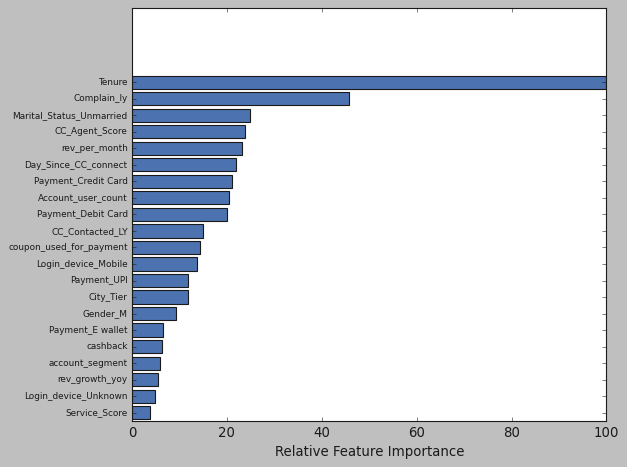

In [284]:
  
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt




#Scale your data
scaler = StandardScaler()
scaler.fit(X_train) 
X_scaled = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)

lgs = LogisticRegression(random_state = 42)
lgs.fit(X_scaled, y_train)

feature_importance = abs(lgs.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

### Building Logistic Regression using Statsmodel Library

In [285]:
import statsmodels.formula.api as SM

In [286]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [287]:
Default_train.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'account_segment', 'CC_Agent_Score',
       'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Gender_M', 'Marital_Status_Unmarried', 'Login_device_Mobile',
       'Login_device_Unknown', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI', 'Churn'],
      dtype='object')

In [288]:
f_1 = 'Churn ~ Tenure + City_Tier + CC_Contacted_LY+Service_Score + Account_user_count+account_segment+CC_Agent_Score + rev_per_month+Complain_ly+rev_growth_yoy+coupon_used_for_payment+Day_Since_CC_connect+cashback'

In [289]:
model_lg = SM.logit(formula = f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.321759
         Iterations 8


In [290]:
model_lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7868
Method:                           MLE   Df Model:                           13
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.2901
Time:                        13:30:42   Log-Likelihood:                -2536.1
converged:                       True   LL-Null:                       -3572.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.1751      0.293    -10.841      0.000      -3.749      -2.601
Tenure                     -0.1783      0.007    -23.876      0.000      -0.193      -0.164
City_Tier                   0.2534      0.039      6.454      0.000       0.176       0.330
CC_Contacted_LY             0.0233      0.004      5.541      0.000       0.015       0.031
Service_Score              -0.0981      0.056     -1.759      0.079      -0.207       0.011
Account_user_count          0.3074      0.039      7.788      0.000       0.230       0.385
account_segment            -0.1053      0.049     -2.156      0.031      -0.201      -0.010
CC_Agent_Score              0.2665      0.027     10.010      0.000       0.214       0.319
rev_per_month               0.1210      0.013      9.551      0.000       0.096       0.146
Complain_ly                 1.5279      0.074     20.528      0.000       1.382       1.674
rev_growth_yoy             -0.0220      0.010     -2.283      0.022      -0.041      -0.003
coupon_used_for_payment     0.1796      0.036      5.044      0.000       0.110       0.249
Day_Since_CC_connect       -0.0901      0.014     -6.566      0.000      -0.117      -0.063
cashback                   -0.0021      0.001     -1.470      0.141      -0.005       0.001
===========================================================================================
"""

Remove the variables that has p_value > 0.05 and check  again as they are insignificant

In [291]:
f_2 = 'Churn ~ Tenure + City_Tier + CC_Contacted_LY+ Account_user_count+account_segment+CC_Agent_Score + rev_per_month+Complain_ly+rev_growth_yoy+coupon_used_for_payment+Day_Since_CC_connect'

In [292]:
model_lg = SM.logit(formula = f_2, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.322162
         Iterations 8


In [293]:
model_lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7882
Model:                          Logit   Df Residuals:                     7870
Method:                           MLE   Df Model:                           11
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.2893
Time:                        13:30:48   Log-Likelihood:                -2539.3
converged:                       True   LL-Null:                       -3572.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.5232      0.255    -13.813      0.000      -4.023      -3.023
Tenure                     -0.1811      0.007    -24.871      0.000      -0.195      -0.167
City_Tier                   0.2503      0.039      6.395      0.000       0.174       0.327
CC_Contacted_LY             0.0227      0.004      5.420      0.000       0.015       0.031
Account_user_count          0.2776      0.037      7.426      0.000       0.204       0.351
account_segment            -0.1377      0.042     -3.292      0.001      -0.220      -0.056
CC_Agent_Score              0.2640      0.027      9.933      0.000       0.212       0.316
rev_per_month               0.1163      0.013      9.286      0.000       0.092       0.141
Complain_ly                 1.5249      0.074     20.514      0.000       1.379       1.671
rev_growth_yoy             -0.0228      0.010     -2.375      0.018      -0.042      -0.004
coupon_used_for_payment     0.1591      0.035      4.579      0.000       0.091       0.227
Day_Since_CC_connect       -0.0929      0.014     -6.814      0.000      -0.120      -0.066
===========================================================================================
"""

In [294]:
y_prob_pred_train = model_lg.predict(Default_train)

In [295]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

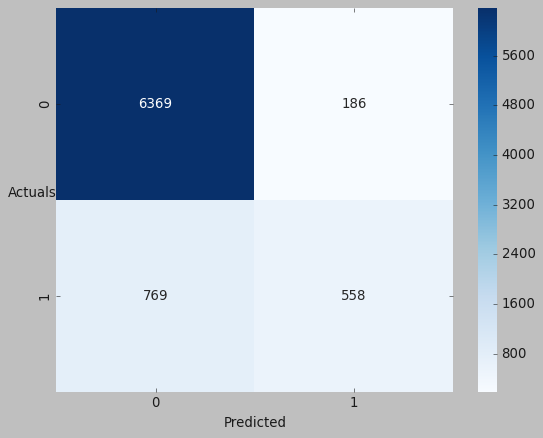

In [296]:
sns.heatmap((metrics.confusion_matrix(Default_train['Churn'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [297]:
print(metrics.classification_report(Default_train['Churn'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.892     0.972     0.930      6555
           1      0.750     0.420     0.539      1327

    accuracy                          0.879      7882
   macro avg      0.821     0.696     0.735      7882
weighted avg      0.868     0.879     0.864      7882



In [298]:
y_prob_pred_test = model_lg.predict(Default_test)

In [299]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.18:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [300]:
print(metrics.classification_report(Default_test['Churn'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.957     0.769     0.853      2809
           1      0.421     0.831     0.559       569

    accuracy                          0.779      3378
   macro avg      0.689     0.800     0.706      3378
weighted avg      0.867     0.779     0.803      3378



Although logistic regression model is showing us which features are important for prediction and giving a valid model, In terms of metrics and predicting the accounts that are churning its not performing well when compared to other models like Random 
Forrest and CART. 

# Linear Discriminant Analysis 
.

### Base Model

In [308]:
#Build LDA Model
lda= LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [309]:
## Performance Matrix on train data set
y_train_predict =lda.predict(X_train)
model_score = lda.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8776960162395331
[[6370  185]
 [ 779  548]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.75      0.41      0.53      1327

    accuracy                           0.88      7882
   macro avg       0.82      0.69      0.73      7882
weighted avg       0.87      0.88      0.86      7882



In [310]:
## Performance Matrix on test data set
y_test_predict = lda.predict(X_test)
model_score = lda.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.87951450562463
[[2730   79]
 [ 328  241]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.75      0.42      0.54       569

    accuracy                           0.88      3378
   macro avg       0.82      0.70      0.74      3378
weighted avg       0.87      0.88      0.87      3378



### Hyper Parameter Tuning

In [304]:
grid={'solver':['svd'],
      'tol':[0.0001,0.00001],
      'n_components': [1,5]}    

In [305]:
model = LinearDiscriminantAnalysis

In [311]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [312]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [1, 5], 'solver': ['svd'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [313]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'n_components': 1, 'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis(n_components=1)


In [314]:
best_model = grid_search.best_estimator_

### Predicting on Training and Test dataset

In [315]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(X_train)
model_score = best_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8776960162395331
[[6370  185]
 [ 779  548]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.75      0.41      0.53      1327

    accuracy                           0.88      7882
   macro avg       0.82      0.69      0.73      7882
weighted avg       0.87      0.88      0.86      7882



In [316]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.87951450562463
[[2730   79]
 [ 328  241]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.75      0.42      0.54       569

    accuracy                           0.88      3378
   macro avg       0.82      0.70      0.74      3378
weighted avg       0.87      0.88      0.87      3378



## LDA with SMOTE

In [317]:

best_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis(n_components=1)

In [318]:
## Performance Matrix on train data set with SMOTE
y_train_predict = best_model.predict(X_train_res)
model_score = best_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8375286041189931
[[5617  938]
 [1192 5363]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      6555
           1       0.85      0.82      0.83      6555

    accuracy                           0.84     13110
   macro avg       0.84      0.84      0.84     13110
weighted avg       0.84      0.84      0.84     13110



In [319]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8197158081705151
[[2380  429]
 [ 180  389]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2809
           1       0.48      0.68      0.56       569

    accuracy                           0.82      3378
   macro avg       0.70      0.77      0.72      3378
weighted avg       0.85      0.82      0.83      3378



Here Although LDA is giving valid model after hyperparameter tuning, its overfitting after SMOTE and LDA is also not giving best results when compared to Random Forrest and CART

### Naive Bayes Model



### Base Model without Tuning

In [320]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [321]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8589190560771378
[[6075  480]
 [ 632  695]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      6555
           1       0.59      0.52      0.56      1327

    accuracy                           0.86      7882
   macro avg       0.75      0.73      0.74      7882
weighted avg       0.85      0.86      0.86      7882



In [322]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8534635879218473
[[2576  233]
 [ 262  307]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2809
           1       0.57      0.54      0.55       569

    accuracy                           0.85      3378
   macro avg       0.74      0.73      0.73      3378
weighted avg       0.85      0.85      0.85      3378



### Hyper Parameter Tuning

In [323]:
grid={
       "var_smoothing" : np.logspace(0,-9, num=100)  } 

In [325]:
model = GaussianNB()

In [326]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='accuracy',verbose=1)

In [327]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [328]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'var_smoothing': 4.328761281083062e-05} 

GaussianNB(var_smoothing=4.328761281083062e-05)


In [329]:
best_model = grid_search.best_estimator_

### Predicting on Training and Test dataset

In [330]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(X_train)
model_score = best_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8660238518142603
[[6146  409]
 [ 647  680]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6555
           1       0.62      0.51      0.56      1327

    accuracy                           0.87      7882
   macro avg       0.76      0.73      0.74      7882
weighted avg       0.86      0.87      0.86      7882



In [331]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8608644168146833
[[2612  197]
 [ 273  296]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2809
           1       0.60      0.52      0.56       569

    accuracy                           0.86      3378
   macro avg       0.75      0.73      0.74      3378
weighted avg       0.85      0.86      0.86      3378



## Naive Bayes with SMOTE

In [332]:

best_model.fit(X_train_res, y_train_res)

GaussianNB(var_smoothing=4.328761281083062e-05)

In [333]:

## Performance Matrix on train data set with SMOTE
y_train_predict = best_model.predict(X_train_res)
model_score = best_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.7398932112890922
[[4255 2300]
 [1110 5445]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71      6555
           1       0.70      0.83      0.76      6555

    accuracy                           0.74     13110
   macro avg       0.75      0.74      0.74     13110
weighted avg       0.75      0.74      0.74     13110



In [334]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6631142687981054
[[1800 1009]
 [ 129  440]]
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      2809
           1       0.30      0.77      0.44       569

    accuracy                           0.66      3378
   macro avg       0.62      0.71      0.60      3378
weighted avg       0.83      0.66      0.71      3378



Here although Naive bayes is giving a valid model after hyper parameter tuning, it is also not giving good metrica and prediction may be because it assumes that the features are independent which is not possible in this case. 

### KNN Algorithm



In [335]:
#Scale the training data and transform the test

x_train_knn = sc.fit_transform(X_train)
x_test_knn = sc.transform(X_test)

In [336]:

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train_knn,y_train)

KNeighborsClassifier()

In [337]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(x_train_knn)
model_score = KNN_model.score(x_train_knn, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9727226592235473
[[6480   75]
 [ 140 1187]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6555
           1       0.94      0.89      0.92      1327

    accuracy                           0.97      7882
   macro avg       0.96      0.94      0.95      7882
weighted avg       0.97      0.97      0.97      7882



In [338]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(x_test_knn)
model_score = KNN_model.score(x_test_knn, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9452338661930136
[[2745   64]
 [ 121  448]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.88      0.79      0.83       569

    accuracy                           0.95      3378
   macro avg       0.92      0.88      0.90      3378
weighted avg       0.94      0.95      0.94      3378



### Hyper Parameter Tuning

In [339]:
grid = {
          'weights':['uniform', 'distance'],
        'algorithm':['auto', 'kd_tree','brute','ball_tree'],
        'n_neighbors': [5,7,10],
        'p' : [1,2]
       } 
     

In [340]:
model = KNeighborsClassifier()

In [341]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='accuracy')

In [342]:
grid_search.fit(x_train_knn, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'kd_tree', 'brute', 'ball_tree'],
                         'n_neighbors': [5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [343]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} 

KNeighborsClassifier(p=1, weights='distance')


In [344]:
best_model = grid_search.best_estimator_

### Predicting on Training and Test dataset

In [345]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(x_train_knn)
model_score = best_model.score(x_train_knn, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6555    0]
 [   0 1327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [346]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(x_test_knn)
model_score = best_model.score(x_test_knn, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9718768502072233
[[2778   31]
 [  64  505]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2809
           1       0.94      0.89      0.91       569

    accuracy                           0.97      3378
   macro avg       0.96      0.94      0.95      3378
weighted avg       0.97      0.97      0.97      3378



### AUC and ROC for the training & test data

In [347]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(x_train_knn)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(x_test_knn)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.994


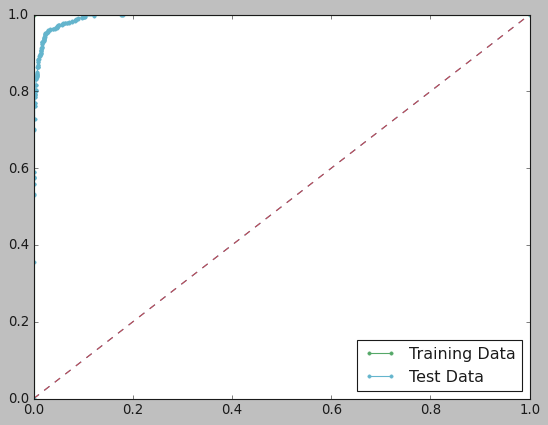

In [348]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data
1
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### KNN Using SMOTE

In [349]:
X_train_res_knn, y_train_res_knn = sm.fit_sample(x_train_knn, y_train.ravel())

In [350]:
best_model.fit(X_train_res_knn,y_train_res_knn)

KNeighborsClassifier(p=1, weights='distance')

In [351]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(X_train_res_knn)
model_score = best_model.score(X_train_res_knn, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res_knn, y_train_predict))
print(metrics.classification_report(y_train_res_knn, y_train_predict))

1.0
[[6555    0]
 [   0 6555]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110



In [352]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(x_test_knn)
model_score = best_model.score(x_test_knn, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9535227945529899
[[2669  140]
 [  17  552]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2809
           1       0.80      0.97      0.88       569

    accuracy                           0.95      3378
   macro avg       0.90      0.96      0.92      3378
weighted avg       0.96      0.95      0.96      3378



### Ada Boost Classifier

In [353]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=42)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [354]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9005328596802842
[[6302  253]
 [ 531  796]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.76      0.60      0.67      1327

    accuracy                           0.90      7882
   macro avg       0.84      0.78      0.81      7882
weighted avg       0.89      0.90      0.90      7882



In [355]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8984606275902901
[[2699  110]
 [ 233  336]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.75      0.59      0.66       569

    accuracy                           0.90      3378
   macro avg       0.84      0.78      0.80      3378
weighted avg       0.89      0.90      0.89      3378



### Hyper Parameter Tuning

In [356]:
grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
   
    'n_estimators':[2000,2500,3000],'learning_rate':[.001,0.01,.0001],
    
}

In [357]:
dtc = DecisionTreeClassifier()

In [358]:
model = AdaBoostClassifier(base_estimator = dtc)



In [359]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [360]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'learning_rate': [0.001, 0.01, 0.0001],
                         'n_estimators': [2000, 2500, 3000]},
             scoring='accuracy')

In [361]:
best_model = grid_search.best_estimator_

### Predicting on Training and Test dataset

In [362]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(X_train)
model_score = best_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6555    0]
 [   0 1327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [363]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.940793368857312
[[2699  110]
 [  90  479]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2809
           1       0.81      0.84      0.83       569

    accuracy                           0.94      3378
   macro avg       0.89      0.90      0.90      3378
weighted avg       0.94      0.94      0.94      3378



### Using SMOTE

In [364]:
best_model.fit(X_train_res, y_train_res)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         splitter='random'),
                   learning_rate=0.0001, n_estimators=2000)

In [365]:
## Performance Matrix on train data set with SMOTE
y_train_predict = best_model.predict(X_train_res)
model_score = best_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

1.0
[[6555    0]
 [   0 6555]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110



In [366]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9328004736530492
[[2672  137]
 [  90  479]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2809
           1       0.78      0.84      0.81       569

    accuracy                           0.93      3378
   macro avg       0.87      0.90      0.88      3378
weighted avg       0.94      0.93      0.93      3378



### AUC and ROC for the training & test data

In [367]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.897


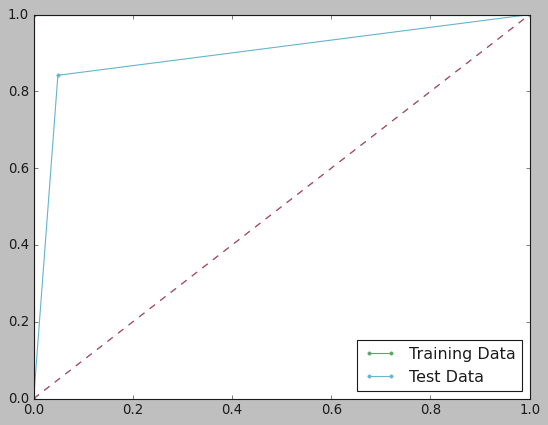

In [368]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data
1
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### GRADIENT BOOSTING CLASSIFIER






### Base Model

In [369]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=42)
gbcl = gbcl.fit(X_train, y_train)

In [370]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9185485917279879
[[6400  155]
 [ 487  840]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6555
           1       0.84      0.63      0.72      1327

    accuracy                           0.92      7882
   macro avg       0.89      0.80      0.84      7882
weighted avg       0.91      0.92      0.91      7882



In [371]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9049733570159858
[[2726   83]
 [ 238  331]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2809
           1       0.80      0.58      0.67       569

    accuracy                           0.90      3378
   macro avg       0.86      0.78      0.81      3378
weighted avg       0.90      0.90      0.90      3378



### Hyper Parameter Tuning

In [372]:
grid = {'n_estimators': [100,200,300],
'learning_rate':[0.2,0.1,1],
'max_depth': [2,3,4,5],
'min_samples_split': [3],
  'max_features':['sqrt'],      
 }


In [373]:
model = GradientBoostingClassifier()

In [374]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [375]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.1, 1],
                         'max_depth': [2, 3, 4, 5], 'max_features': ['sqrt'],
                         'min_samples_split': [3],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [376]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)


{'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 300} 

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_features='sqrt',
                           min_samples_split=3, n_estimators=300)


In [377]:
best_model = grid_search.best_estimator_

### Predicting on Training and Test dataset

In [378]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(X_train)
model_score = best_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9997462572951028
[[6555    0]
 [   2 1325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [379]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9653641207815276
[[2778   31]
 [  86  483]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.94      0.85      0.89       569

    accuracy                           0.97      3378
   macro avg       0.95      0.92      0.94      3378
weighted avg       0.96      0.97      0.96      3378



### AUC and ROC for the training & test data

In [380]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.990


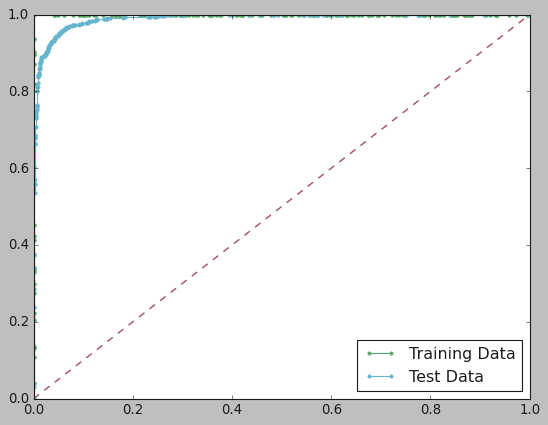

In [381]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data
1
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Using SMOTE

In [382]:
best_model.fit(X_train_res,y_train_res)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_features='sqrt',
                           min_samples_split=3, n_estimators=300)

In [383]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(X_train_res)
model_score = best_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9990846681922196
[[6552    3]
 [   9 6546]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110



In [384]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9573712255772646
[[2761   48]
 [  96  473]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2809
           1       0.91      0.83      0.87       569

    accuracy                           0.96      3378
   macro avg       0.94      0.91      0.92      3378
weighted avg       0.96      0.96      0.96      3378



### Bagging Classifier

In [385]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [386]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6555    0]
 [   0 1327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [387]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9573712255772646
[[2761   48]
 [  96  473]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2809
           1       0.91      0.83      0.87       569

    accuracy                           0.96      3378
   macro avg       0.94      0.91      0.92      3378
weighted avg       0.96      0.96      0.96      3378



### Hyper Parameter Tuning

In [388]:
grid = {'n_estimators': [50,60,75]
       }


rfcl = RandomForestClassifier()
model=BaggingClassifier(base_estimator=rfcl,random_state=42)


In [389]:
grid_search = GridSearchCV(estimator=model,param_grid=grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [390]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(),
                                         random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [50, 60, 75]},
             scoring='accuracy')

In [391]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'n_estimators': 50} 

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50,
                  random_state=42)


In [392]:
best_model = grid_search.best_estimator_

### Predicting on Training and Test dataset

In [393]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(X_train)
model_score = best_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9959401167216443
[[6555    0]
 [  32 1295]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      0.98      0.99      1327

    accuracy                           1.00      7882
   macro avg       1.00      0.99      0.99      7882
weighted avg       1.00      1.00      1.00      7882



In [394]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9461219656601539
[[2784   25]
 [ 157  412]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2809
           1       0.94      0.72      0.82       569

    accuracy                           0.95      3378
   macro avg       0.94      0.86      0.89      3378
weighted avg       0.95      0.95      0.94      3378



### Using SMOTE

In [395]:
best_model.fit(X_train_res,y_train_res)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50,
                  random_state=42)

In [396]:
## Performance Matrix on train data set
y_train_predict = best_model.predict(X_train_res)
model_score = best_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9987795575896262
[[6551    4]
 [  12 6543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110



In [397]:
## Performance Matrix on test data set
y_test_predict = best_model.predict(X_test)
model_score = best_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9579632918886916
[[2754   55]
 [  87  482]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2809
           1       0.90      0.85      0.87       569

    accuracy                           0.96      3378
   macro avg       0.93      0.91      0.92      3378
weighted avg       0.96      0.96      0.96      3378

